In [461]:
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn import svm, ensemble, linear_model, neighbors, naive_bayes
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

%matplotlib inline

## Read in data accessed from Google Big Query

In [275]:
bls_2009=pd.read_csv('BQ_BLS_2009.csv')
bls_2010=pd.read_csv('BQ_BLS_2010.csv')
bls_2011=pd.read_csv('BQ_BLS_2011.csv')
bls_2012=pd.read_csv('BQ_BLS_2012.csv')
bls_2013=pd.read_csv('BQ_BLS_2013.csv')
bls_2014=pd.read_csv('BQ_BLS_2014.csv')
bls_2015=pd.read_csv('BQ_BLS_2015.csv')
bls_2016=pd.read_csv('BQ_BLS_2016.csv')


In [3]:
bls_2009

state_fips_code  area_fips           county_name  vote_republican   \
0                   2       2122       Kenai Peninsula               NaN   
1                   2       2261        Valdez-Cordova               NaN   
2                   2       2170     Matanuska-Susitna               NaN   
3                   2       2020             Anchorage               NaN   
4                   2       2090  Fairbanks North Star               NaN   
...               ...        ...                   ...               ...   
3215               48      48371                 Pecos               1.0   
3216               48      48449                 Titus               1.0   
3217               49      49043                Summit               0.0   
3218               54      54107                  Wood               1.0   
3219               72      72085           Las Piedras               NaN   

      year   prof_business_serv_employ  financial_activities_employ  \
0      2009                     614.50                       468.25   
1      2009                      83.75                       165.75   
2      2009                    1040.50                       629.50   
3      2009                   17768.25                      8064.50   
4      2009                    2182.25                      1454.25   
...     ...                        ...                          ...   
3215   2009                     126.25                       210.50   
3216   2009                     469.75                       435.75   
3217   2009                    1546.75                      1473.75   
3218   2009                    2469.00                      2018.25   
3219   2009                       0.00                       259.50   

      unclass_employ  mining_employ  hospitality_employ  ...  \
0              11.25        1149.25             2304.50  ...   
1               9.00         103.75              466.50  ...   
2              46.00         129.75             2315.25  ...   
3             106.25        2855.25            15646.00  ...   
4              13.00        1118.75             4121.25  ...   
...              ...            ...                 ...  ...   
3215            1.75        1290.75              531.75  ...   
3216            1.75         449.50             1267.00  ...   
3217            1.75         129.50             7592.25  ...   
3218            1.75         260.75             4410.25  ...   
3219            1.75         105.25              333.75  ...   

      unclass_avg_week_wage  mining_avg_week_wage  hospitality_avg_week_wage  \
0                    360.75               1678.25                     308.75   
1                    717.50                717.00                     356.25   
2                    379.75                552.75                     288.25   
3                    523.50               3297.00                     375.75   
4                    697.75               1727.00                     342.00   
...                     ...                   ...                        ...   
3215                  82.50               1056.00                     258.75   
3216                 223.25               1324.00                     234.00   
3217                 299.25                793.25                     432.75   
3218                  97.25                815.50                     242.25   
3219                  54.00                215.00                     254.00   

      info_avg_week_wage  manufacturing_avg_week_wage  \
0                 830.25                       989.00   
1                1239.00                       734.50   
2                1086.75                       709.75   
3                1130.00                       833.00   
4                 982.00                      1008.25   
...                  ...                          ...   
3215              658.00                       400.50   
3216              578.50                       662.50 

In [4]:
bls_2010.shape

(3220, 41)

In [5]:

bls_2011.shape

(3220, 41)

In [6]:
bls_2012.shape

(3220, 41)

In [7]:
bls_2013.shape

(3220, 41)

In [8]:
bls_2014.shape

(3220, 41)

In [9]:
bls_2015.shape

(3222, 41)

In [10]:
bls_2016

state_fips_code  area_fips county_name  vote_republican  year   \
0                   1       1039   Covington              1.0   2016   
1                   1       1013      Butler              1.0   2016   
2                   1       1095    Marshall              1.0   2016   
3                   1       1015     Calhoun              1.0   2016   
4                   1       1081         Lee              1.0   2016   
...               ...        ...         ...              ...    ...   
3217               42      42037    Columbia              1.0   2016   
3218               42      42087     Mifflin              1.0   2016   
3219               50      50011    Franklin              0.0   2016   
3220               51      51740  Portsmouth              0.0   2016   
3221               54      54025  Greenbrier              1.0   2016   

      prof_business_serv_employ  financial_activities_employ  unclass_employ  \
0                        901.25                       438.25             NaN   
1                        495.25                       179.25             NaN   
2                       2127.50                      1222.25             NaN   
3                       4175.75                      1248.00             NaN   
4                       6839.00                      1963.75             NaN   
...                         ...                          ...             ...   
3217                    2344.50                       797.75             NaN   
3218                     343.75                       443.75             NaN   
3219                    1641.75                       349.75             NaN   
3220                    3297.25                       896.00            36.0   
3221                     835.25                       358.75            13.0   

      mining_employ  hospitality_employ  ...  unclass_avg_week_wage  \
0            190.25              894.75  ...                    NaN   
1            196.25              865.50  ...                    NaN   
2            212.50             3506.00  ...                    NaN   
3            178.00             4994.25  ...                    NaN   
4            358.50             7764.25  ...                    NaN   
...             ...                 ...  ...                    ...   
3217         181.00             2729.50  ...                    NaN   
3218         168.50             1281.75  ...                    NaN   
3219         563.25             1025.50  ...                    NaN   
3220           0.00             2547.75  ...                1101.25   
3221         389.00             2781.25  ...                 688.00   

      mining_avg_week_wage  hospitality_avg_week_wage  info_avg_week_wage  \
0                   711.75                     255.25              783.50   
1                   814.25                     256.25              594.50   
2                  1039.50                     259.00              930.50   
3                   764.50                     279.00              890.00   
4                  1179.50                     279.00              758.50   
...                    ...                        ...                 ...   
3217                608.00                     263.50              790.00   
3218                765.50                     240.75              622.50   
3219                621.75                     344.75              800.00   
3220                  0.00                     284.00             1345.75   
3221               1043.25                     520.00              845.25   

      manufacturing_avg_week_wage  other_services_avg_week_wage  \
0                          720.00                        584.25   
1                          819.75                        514.00   
2                          687.00                        533.25   
3                          944.25                        537.50   
4                          870.50                        550.75   


In [11]:
bls_2016.columns.tolist()

['state_fips_code',
 'area_fips',
 'county_name',
 'vote_republican',
 'year ',
 'prof_business_serv_employ',
 'financial_activities_employ',
 'unclass_employ',
 'mining_employ',
 'hospitality_employ',
 'info_employ',
 'manufacturing_employ',
 'other_services_employ',
 'edu_health_services_employ',
 'construction_employ',
 'trade_transport_employ',
 'total_all_industries_employ',
 'prof_business_serv_estab',
 'financial_activities_estab',
 'unclass_estab',
 'mining_estab',
 'hospitality_estab',
 'info_estab',
 'manufacturing_estab',
 'other_services_estab',
 'edu_health_services_estab',
 'construction_estab',
 'trade_transport_estab',
 'total_all_industries_estab',
 'prof_business_serv_avg_week_wage',
 'financial_activities_avg_week_wage',
 'unclass_avg_week_wage',
 'mining_avg_week_wage',
 'hospitality_avg_week_wage',
 'info_avg_week_wage',
 'manufacturing_avg_week_wage',
 'other_services_avg_week_wage',
 'edu_health_services_avg_week_wage',
 'construction_avg_week_wage',
 'trade_tran

## Combine all the data sets, drop non-counties 

In [12]:
bls_2009.columns=bls_2016.columns.str.strip()
bls_2010.columns=bls_2016.columns.str.strip()
bls_2011.columns=bls_2016.columns.str.strip()
bls_2012.columns=bls_2016.columns.str.strip()
bls_2013.columns=bls_2016.columns.str.strip()
bls_2014.columns=bls_2016.columns.str.strip()
bls_2015.columns=bls_2016.columns.str.strip()
bls_2016.columns=bls_2016.columns.str.strip()

In [13]:
bls_2016.columns=bls_2016.columns.str.strip()

In [14]:
df=pd.concat([bls_2009,bls_2010,bls_2011,bls_2012,bls_2013,bls_2014,bls_2015,bls_2016], ignore_index=True)

In [15]:
df.shape

(25764, 41)

In [16]:
df.columns.tolist()

['state_fips_code',
 'area_fips',
 'county_name',
 'vote_republican',
 'year',
 'prof_business_serv_employ',
 'financial_activities_employ',
 'unclass_employ',
 'mining_employ',
 'hospitality_employ',
 'info_employ',
 'manufacturing_employ',
 'other_services_employ',
 'edu_health_services_employ',
 'construction_employ',
 'trade_transport_employ',
 'total_all_industries_employ',
 'prof_business_serv_estab',
 'financial_activities_estab',
 'unclass_estab',
 'mining_estab',
 'hospitality_estab',
 'info_estab',
 'manufacturing_estab',
 'other_services_estab',
 'edu_health_services_estab',
 'construction_estab',
 'trade_transport_estab',
 'total_all_industries_estab',
 'prof_business_serv_avg_week_wage',
 'financial_activities_avg_week_wage',
 'unclass_avg_week_wage',
 'mining_avg_week_wage',
 'hospitality_avg_week_wage',
 'info_avg_week_wage',
 'manufacturing_avg_week_wage',
 'other_services_avg_week_wage',
 'edu_health_services_avg_week_wage',
 'construction_avg_week_wage',
 'trade_trans

In [17]:
df.vote_republican.isna().sum()

876

In [24]:
df.dropna(subset=['vote_republican'],inplace=True)

In [19]:
df.shape

(24888, 41)

In [20]:
df.reset_index(inplace=True)

In [21]:
df

index  state_fips_code  area_fips county_name  vote_republican  year  \
0          6                4       4005    Coconino              0.0  2009   
1          7                4       4015      Mohave              1.0  2009   
2          8                4       4023  Santa Cruz              0.0  2009   
3          9                4       4021       Pinal              1.0  2009   
4         10                4       4013    Maricopa              1.0  2009   
...      ...              ...        ...         ...              ...   ...   
24883  25759               42      42037    Columbia              1.0  2016   
24884  25760               42      42087     Mifflin              1.0  2016   
24885  25761               50      50011    Franklin              0.0  2016   
24886  25762               51      51740  Portsmouth              0.0  2016   
24887  25763               54      54025  Greenbrier              1.0  2016   

       prof_business_serv_employ  financial_activities_employ  unclass_employ  \
0                        2655.75                      1332.50           27.25   
1                        3242.50                      1729.25           40.25   
2                         758.50                       404.00           12.75   
3                        4653.00                      1405.00           20.25   
4                      263920.25                    135213.00         1165.00   
...                          ...                          ...             ...   
24883                    2344.50                       797.75             NaN   
24884                     343.75                       443.75             NaN   
24885                    1641.75                       349.75             NaN   
24886                    3297.25                       896.00           36.00   
24887                     835.25                       358.75           13.00   

       mining_employ  ...  unclass_avg_week_wage  mining_avg_week_wage  \
0             136.75  ...                 511.00                543.25   
1             539.50  ...                 589.25                769.00   
2              75.00  ...                 662.75                433.25   
3            3150.75  ...                 561.25                823.00   
4            8107.00  ...                 686.25                775.00   
...              ...  ...                    ...                   ...   
24883         181.00  ...                    NaN                608.00   
24884         168.50  ...                    NaN                765.50   
24885         563.25  ...                    NaN                621.75   
24886           0.00  ...                1101.25                  0.00   
24887         389.00  ...                 688.00               1043.25   

       hospitality_avg_week_wage  info_avg_week_wage  \
0                         344.25              727.25   
1                         267.75              592.00   
2                         293.25              572.75   
3                         333.25              763.75   
4                         408.25             1128.00   
...                          ...                 ...   
24883                     263.50              790.00   
24884                     240.75              622.50   
24885                     344.75              800.00   
24886                     284.00             1345.75   
24887                     520.00              845.25   

       manufacturing_avg_week_wage  other_services_avg_week_wage  \
0                          1055.25                        500.50   
1                           727.00                        406.25   
2                           656.75                        335.25   
3                           852.25                        428.00   
4                          1196.75                        588.00   
...                            ...                           ...   
24883                       891.00             

In [23]:
df.isna().sum()

index                                     0
state_fips_code                           0
area_fips                                 0
county_name                               0
vote_republican                           0
year                                      0
prof_business_serv_employ                55
financial_activities_employ              65
unclass_employ                        14359
mining_employ                           186
hospitality_employ                       56
info_employ                             735
manufacturing_employ                    425
other_services_employ                   119
edu_health_services_employ              137
construction_employ                      72
trade_transport_employ                    2
total_all_industries_employ               0
prof_business_serv_estab                 55
financial_activities_estab               65
unclass_estab                         14359
mining_estab                            186
hospitality_estab               

## Preliminary EDA 

In [22]:
df['vote_republican'].sum()

21280.0

In [89]:
use_vars=[
 'vote_republican',
 'prof_business_serv_employ',
 'financial_activities_employ',
 'unclass_employ',
 'mining_employ',
 'hospitality_employ',
 'info_employ',
 'manufacturing_employ',
 'other_services_employ',
 'edu_health_services_employ',
 'construction_employ',
 'trade_transport_employ',
 'total_all_industries_employ']

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


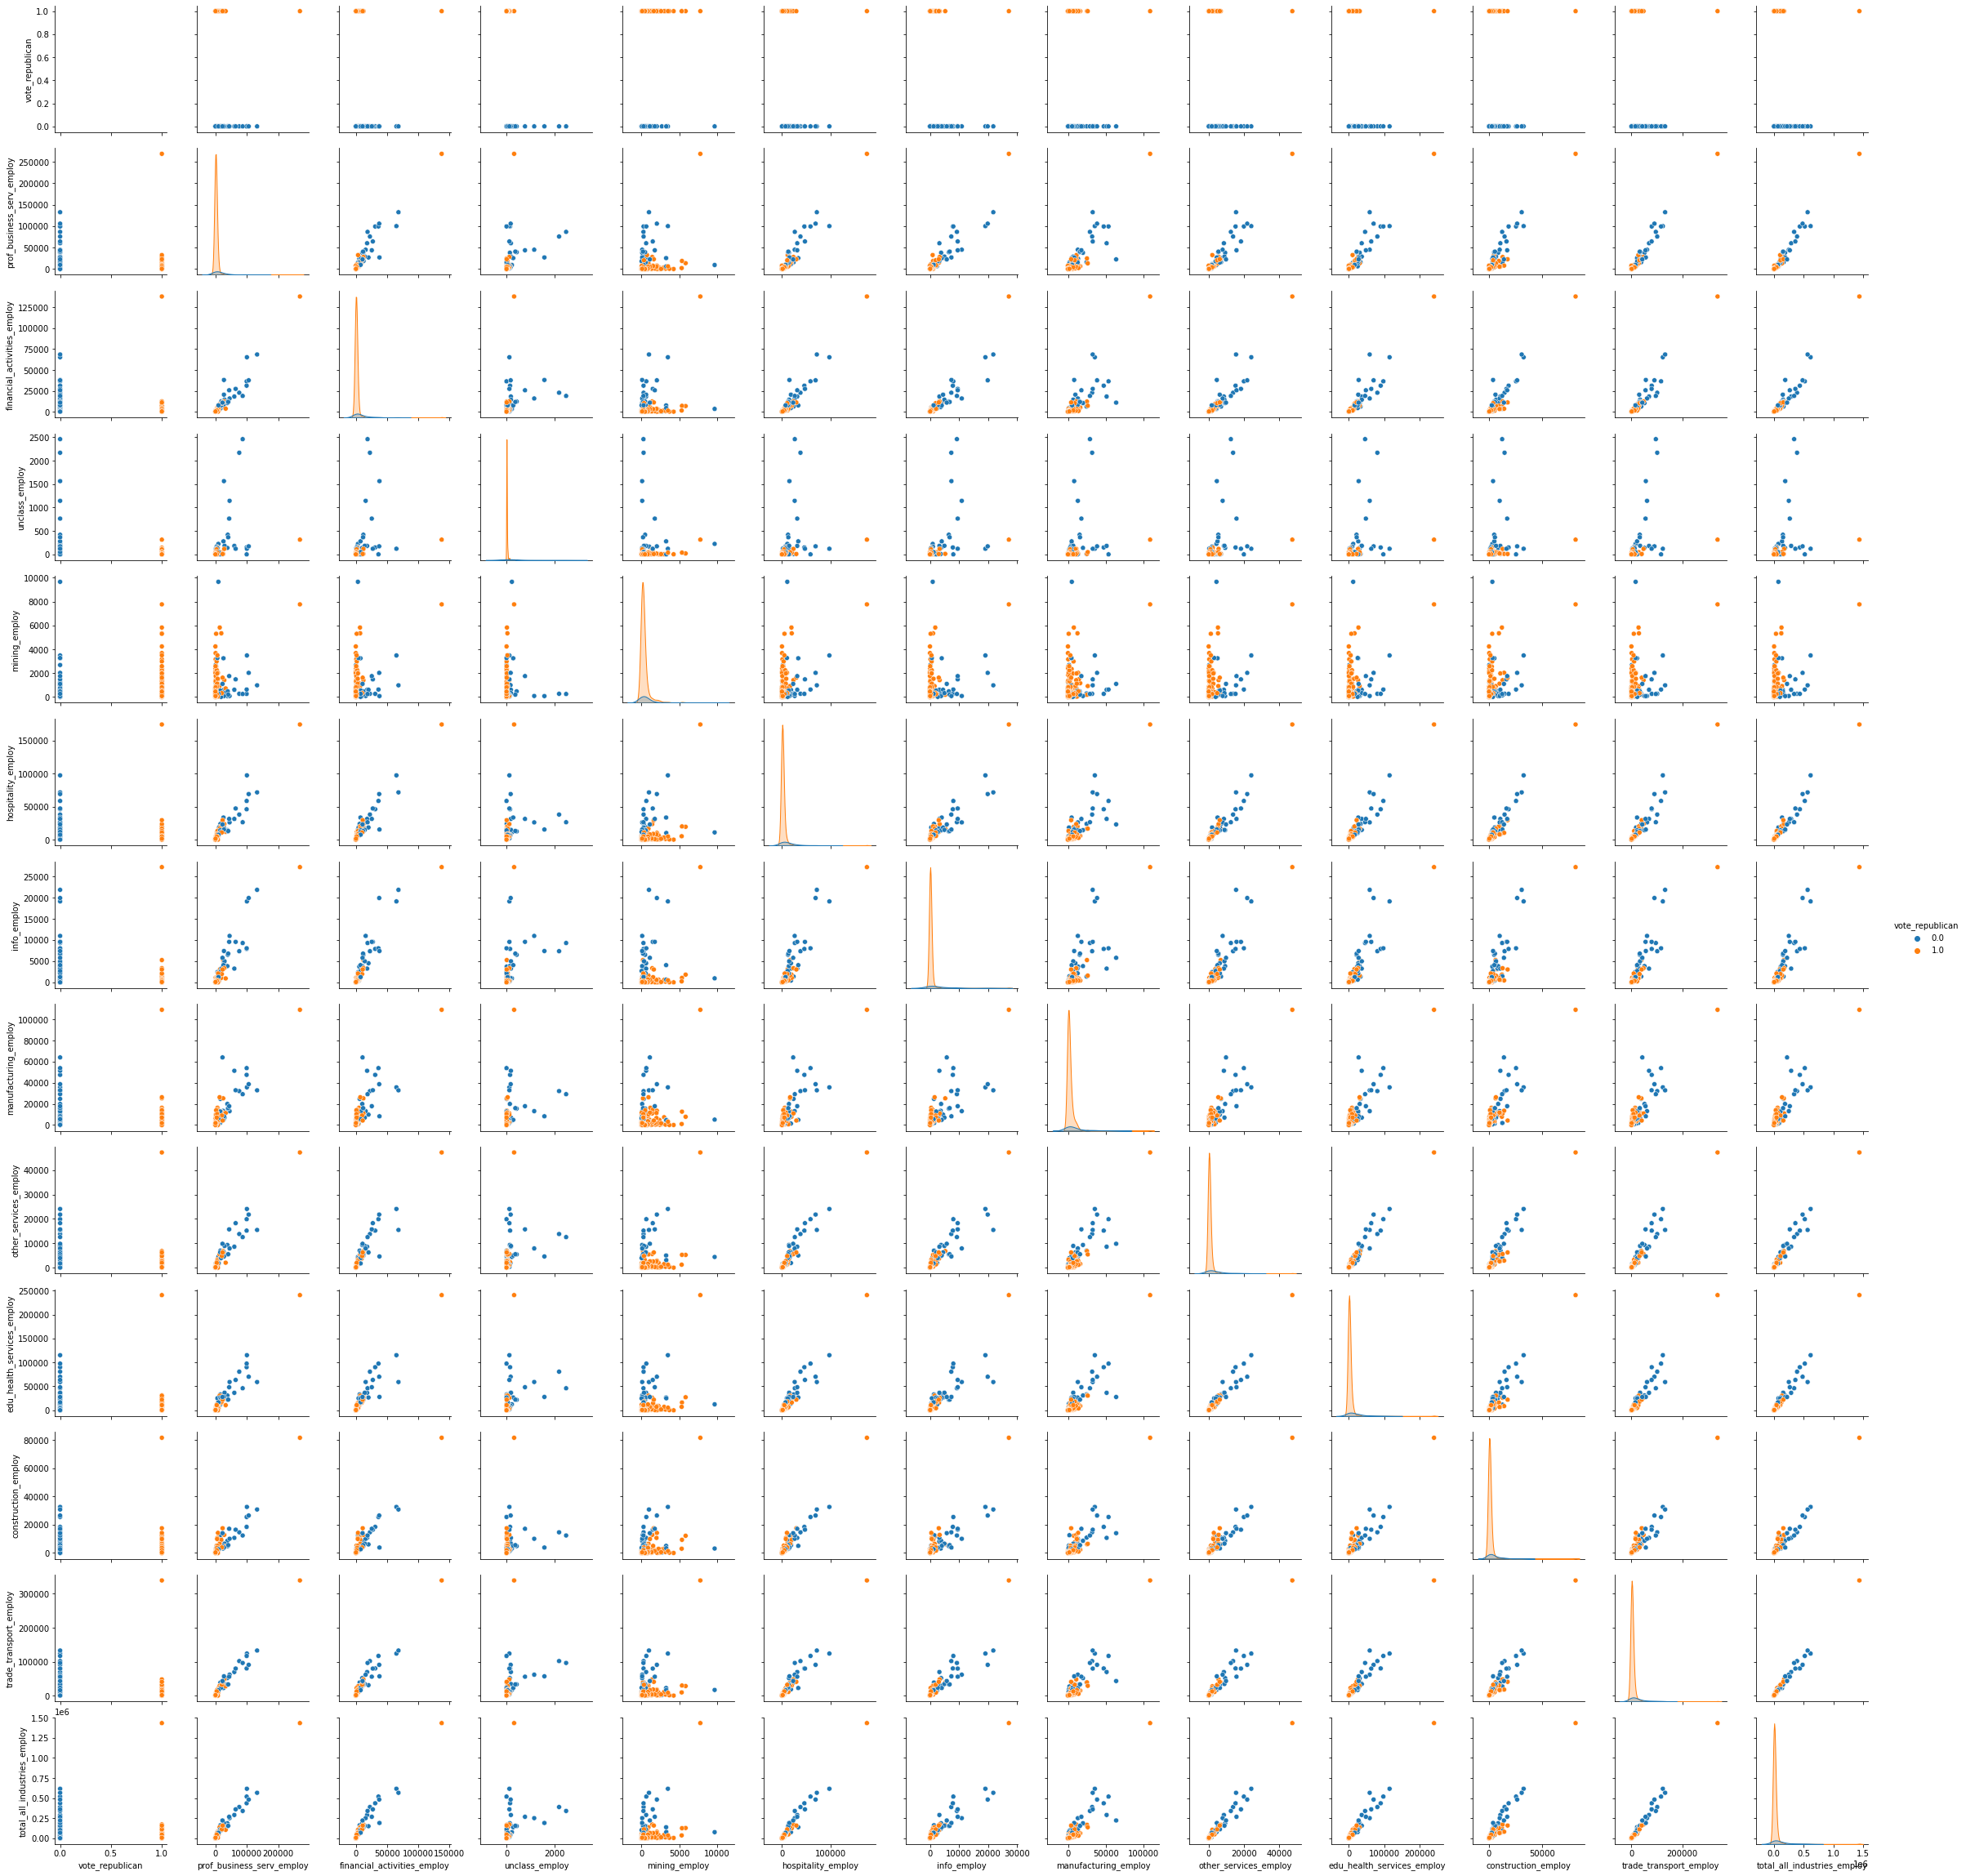

In [28]:
sns.pairplot(df.sample(500),hue='vote_republican', vars=use_vars)

In [25]:
use_vars_2=[
 'vote_republican',
'prof_business_serv_estab',
 'financial_activities_estab',
 'unclass_estab',
 'mining_estab',
 'hospitality_estab',
 'info_estab',
 'manufacturing_estab',
 'other_services_estab',
 'edu_health_services_estab',
 'construction_estab',
 'trade_transport_estab',
 'total_all_industries_estab']

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


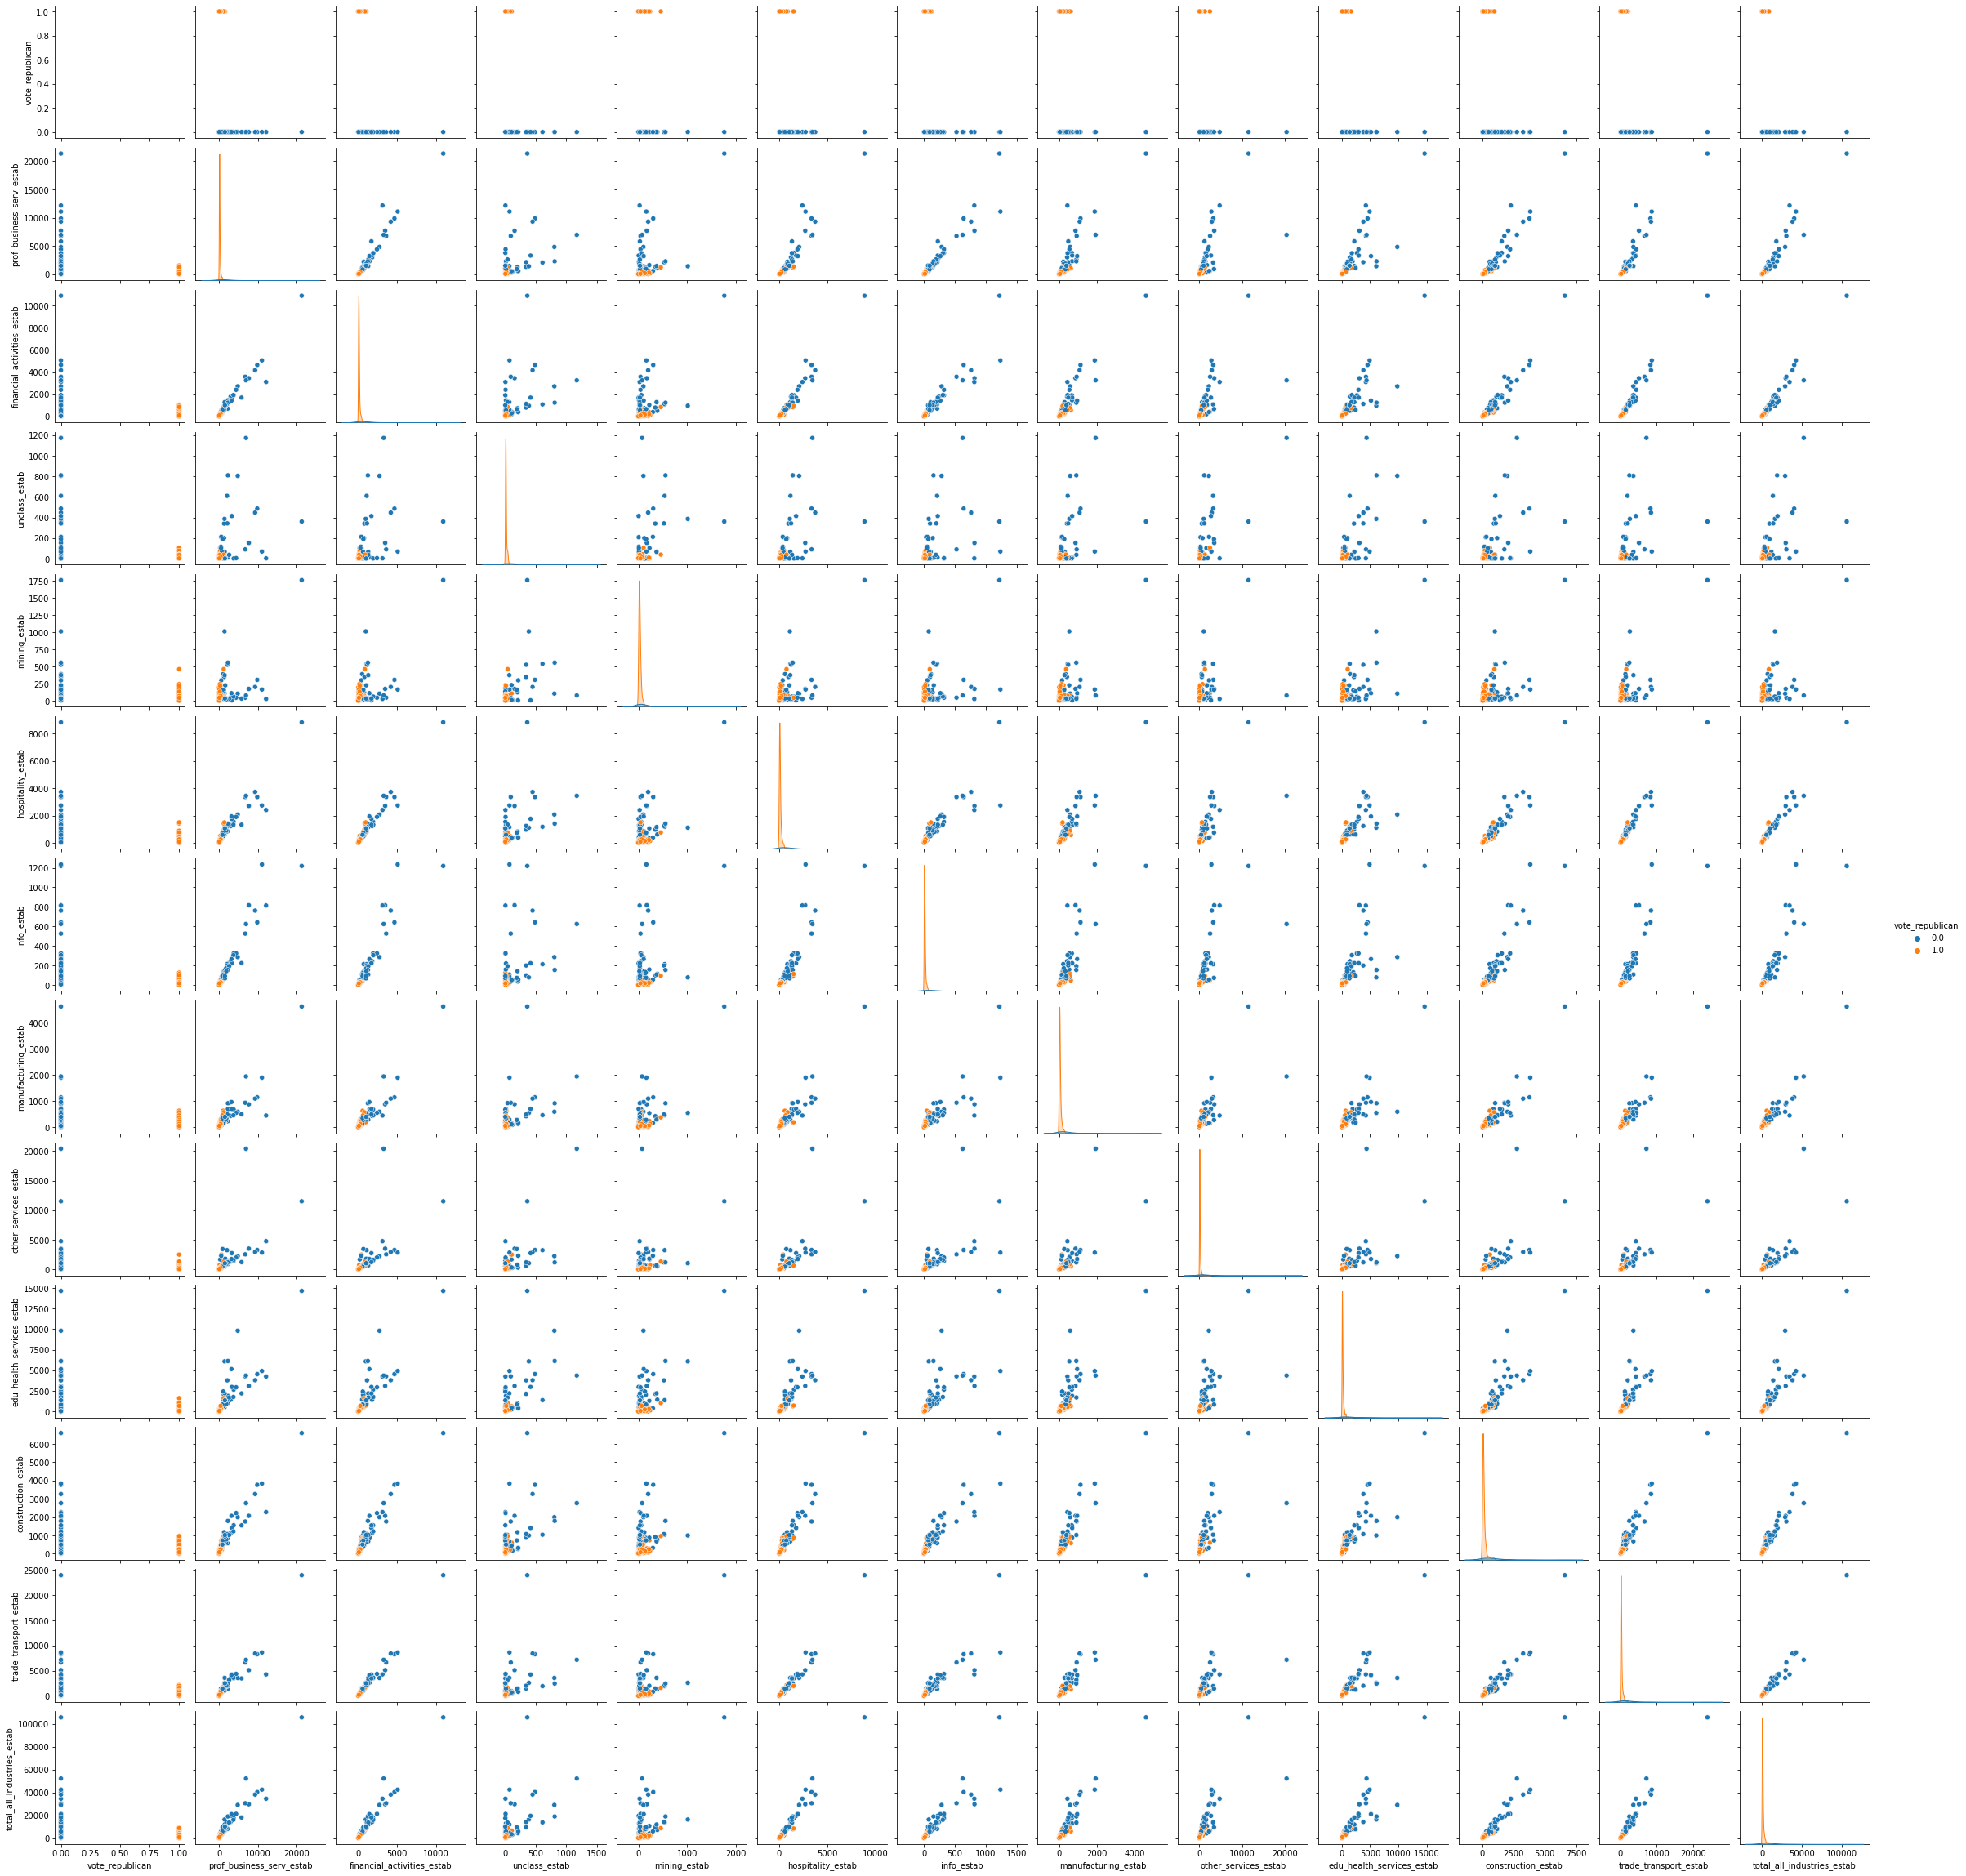

In [123]:
sns.pairplot(df.sample(500),hue='vote_republican', vars=use_vars_2)

In [26]:
use_vars_3=[
 'vote_republican',
'prof_business_serv_avg_week_wage',
 'financial_activities_avg_week_wage',
 'unclass_avg_week_wage',
 'mining_avg_week_wage',
 'hospitality_avg_week_wage',
 'info_avg_week_wage',
 'manufacturing_avg_week_wage',
 'other_services_avg_week_wage',
 'edu_health_services_avg_week_wage',
 'construction_avg_week_wage',
 'trade_transport_avg_week_wage',
 'total_all_industries_avg_week_wage']

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


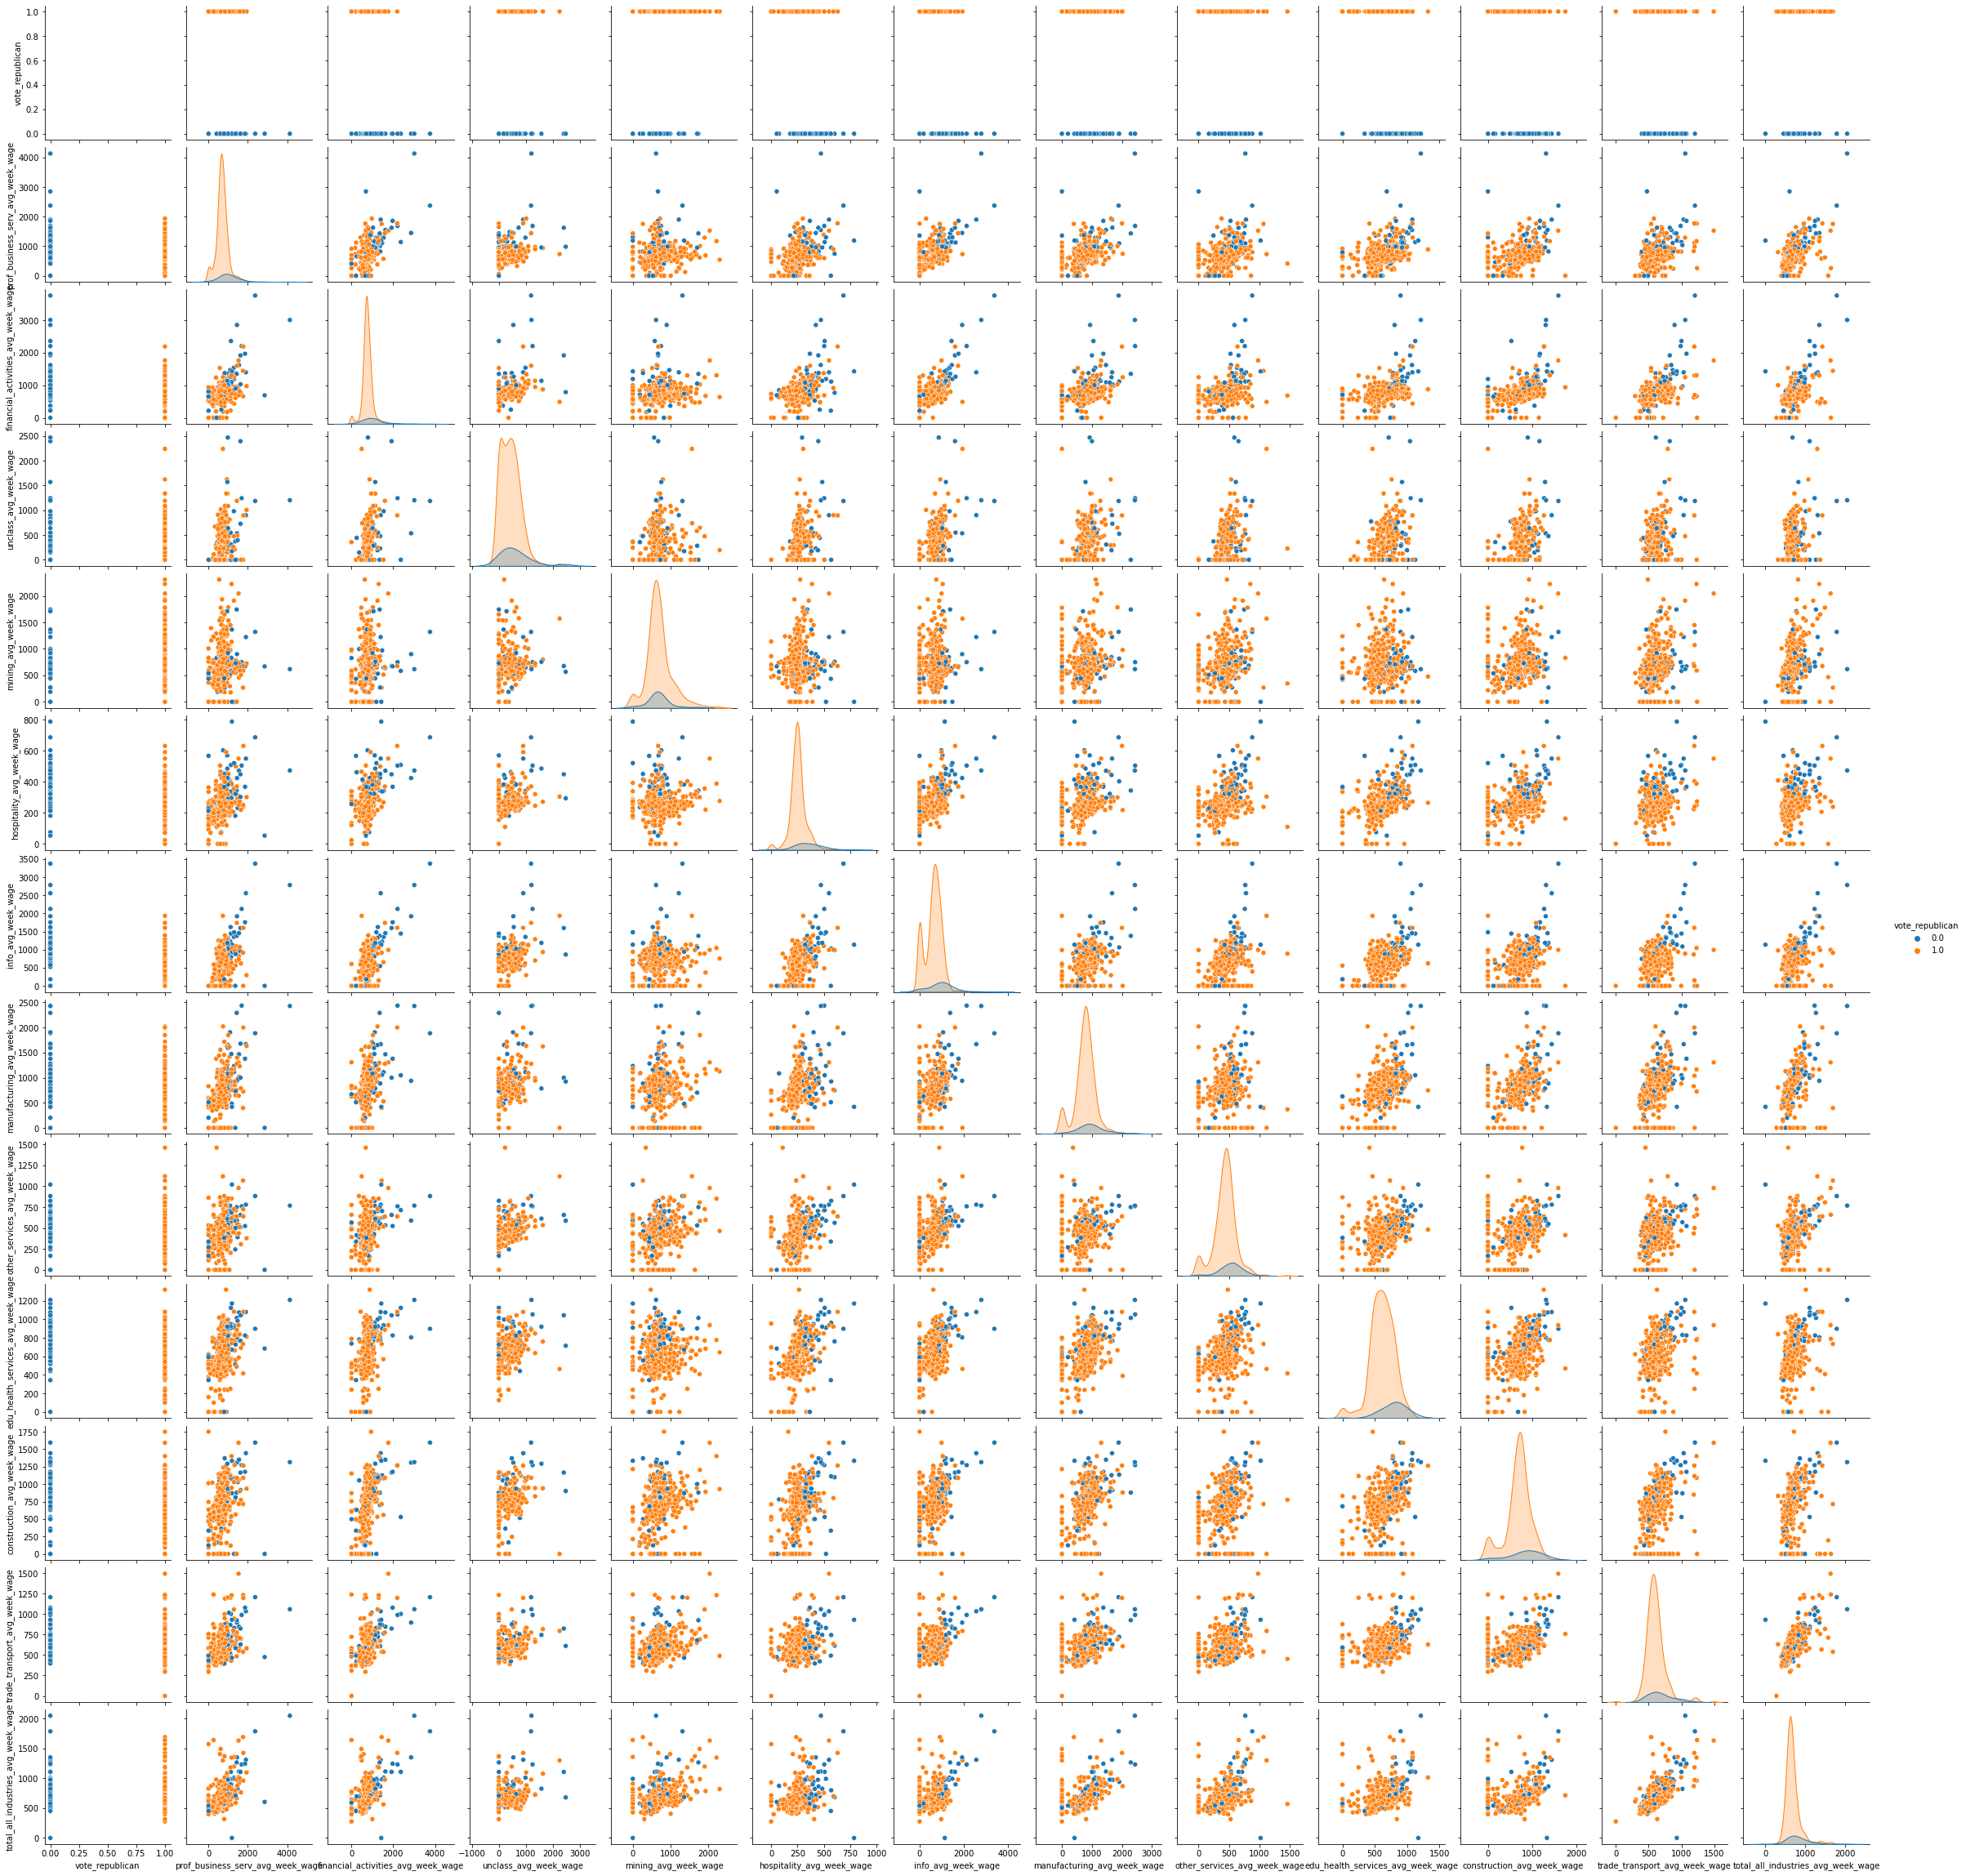

In [127]:
sns.pairplot(df.sample(500),hue='vote_republican', vars=use_vars_3)

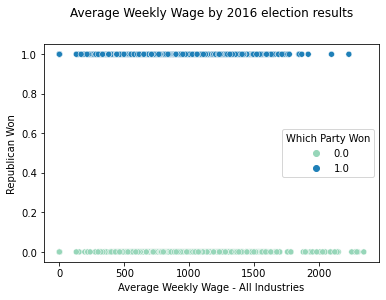

In [25]:

fig, ax = plt.subplots()
plt.title('Average Weekly Wage by 2016 election results', y=1.1)
g=sns.scatterplot(data=df, y='vote_republican', x='total_all_industries_avg_week_wage', hue='vote_republican', palette="YlGnBu")

plt.ylabel('Republican Won')
plt.xlabel('Average Weekly Wage - All Industries')
first_legend=plt.legend(
        title='Which Party Won',
        loc='right'
    )
# replace labels
# leg = ax.legend(title='Which Party Won', loc='right', labels=['Dem. won', 'Rep. won'])
# plt.legend(title='Which Party Won', loc='upper left', labels=['Dem. won', 'Rep. won'])            
plt.savefig('avg_weekly_wage',bbox_inches = "tight",facecolor='w', edgecolor='w');

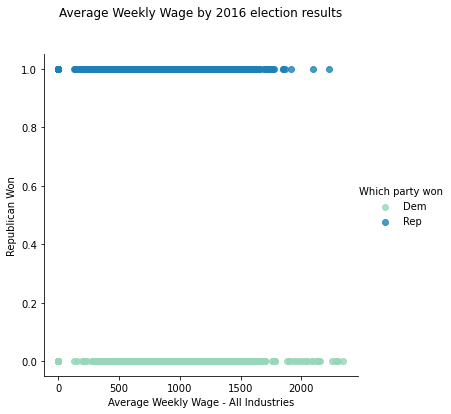

In [38]:


# fig, ax = plt.subplots()

g=sns.lmplot(data=df, y='vote_republican', x='total_all_industries_avg_week_wage', hue='vote_republican', palette="YlGnBu", fit_reg=False)
plt.title('Average Weekly Wage by 2016 election results', y=1.1)
plt.ylabel('Republican Won')
plt.xlabel('Average Weekly Wage - All Industries')
plt.title('Average Weekly Wage by 2016 election results', y=1.1)
new_title='Which party won'
g._legend.set_title(new_title)
new_labels = ['Dem', 'Rep']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# first_legend=plt.legend(
#         title='Which Party Won',
#         loc='right'
#     )
# replace labels
# leg = ax.legend(title='Which Party Won', loc='right', labels=['Dem. won', 'Rep. won'])
# plt.legend(title='Which Party Won', loc='upper left', labels=['Dem. won', 'Rep. won'])            
plt.savefig('avg_weekly_wage_2',bbox_inches = "tight",facecolor='w', edgecolor='w');

<AxesSubplot:xlabel='manufacturing_avg_week_wage', ylabel='vote_republican'>

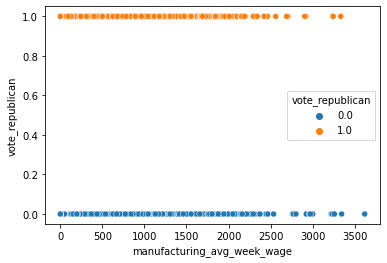

In [26]:
sns.scatterplot(data=df, y='vote_republican', x='manufacturing_avg_week_wage', hue='vote_republican')

<AxesSubplot:xlabel='hospitality_avg_week_wage', ylabel='vote_republican'>

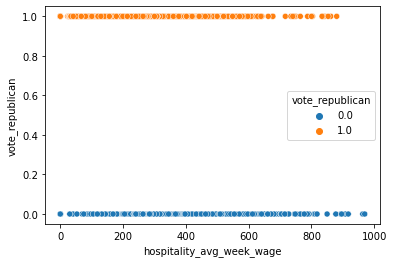

In [29]:
sns.scatterplot(data=df, y='vote_republican', x='hospitality_avg_week_wage', hue='vote_republican')

In [27]:
df[df['total_all_industries_avg_week_wage']==0]


index  state_fips_code  area_fips county_name  vote_republican  year  \
781      799               10      10001        Kent              1.0  2009   
833      851               16      16025       Camas              1.0  2009   
1514    1532               30      30069   Petroleum              1.0  2009   
1617    1635               32      32009   Esmeralda              1.0  2009   
1777    1795               42      42113    Sullivan              1.0  2009   
...      ...              ...        ...         ...              ...   ...   
23168  23971               42      42053      Forest              1.0  2016   
23217  24020               53      53023    Garfield              1.0  2016   
23224  24027               56      56027    Niobrara              1.0  2016   
24612  25473               22      22107      Tensas              0.0  2016   
24730  25591               54      54105        Wirt              1.0  2016   

       prof_business_serv_employ  financial_activities_employ  unclass_employ  \
781                      3916.00                      1922.50             NaN   
833                        51.00                         0.00             NaN   
1514                         NaN                          NaN             NaN   
1617                        1.50                          NaN             NaN   
1777                       46.00                        30.75             NaN   
...                          ...                          ...             ...   
23168                       2.50                        17.75             NaN   
23217                        NaN                        13.75             NaN   
23224                      17.25                        25.00             NaN   
24612                     107.75                        29.50             0.0   
24730                      14.25                        14.75             NaN   

       mining_employ  ...  unclass_avg_week_wage  mining_avg_week_wage  \
781             0.00  ...                    NaN                  0.00   
833            44.75  ...                    NaN                619.50   
1514            0.00  ...                    NaN                  0.00   
1617           66.75  ...                    NaN                997.25   
1777           10.50  ...                    NaN                280.50   
...              ...  ...                    ...                   ...   
23168         112.00  ...                    NaN               1345.25   
23217           0.00  ...                    NaN                  0.00   
23224          39.50  ...                    NaN                913.50   
24612         145.25  ...                    0.0                644.75   
24730           0.00  ...                    NaN                  0.00   

       hospitality_avg_week_wage  info_avg_week_wage  \
781                       334.25               913.5   
833                       227.00                 NaN   
1514                       35.75                 0.0   
1617                        0.00                 NaN   
1777                      256.50               280.0   
...                          ...                 ...   
23168                     195.00                 0.0   
23217                     241.75                 0.0   
23224                       0.00                 0.0   
24612                     279.50                 0.0   
24730                     314.00                 0.0   

       manufacturing_avg_week_wage  other_services_avg_week_wage  \
781                         949.25                        465.50   
833                           0.00                          0.00   
1514                           NaN                          0.00   
1617                          0.00                          0.00   
1777                          0.00                        248.00   
...                            ...                           ...   
23168                         0.00             

   ## Train, Test, Split and Run KNN with baseline model, all features linear

In [28]:
y=df[['county_name', 'state_fips_code','area_fips','year','vote_republican']]

In [29]:
y

county_name  state_fips_code  area_fips  year  vote_republican
0        Coconino                4       4005  2009              0.0
1          Mohave                4       4015  2009              1.0
2      Santa Cruz                4       4023  2009              0.0
3           Pinal                4       4021  2009              1.0
4        Maricopa                4       4013  2009              1.0
...           ...              ...        ...   ...              ...
24883    Columbia               42      42037  2016              1.0
24884     Mifflin               42      42087  2016              1.0
24885    Franklin               50      50011  2016              0.0
24886  Portsmouth               51      51740  2016              0.0
24887  Greenbrier               54      54025  2016              1.0

[24888 rows x 5 columns]

In [30]:
X=df[[
 'year',
'prof_business_serv_employ',
 'financial_activities_employ',
 'unclass_employ',
 'mining_employ',
 'hospitality_employ',
 'info_employ',
 'manufacturing_employ',
 'other_services_employ',
 'edu_health_services_employ',
 'construction_employ',
 'trade_transport_employ',
 'total_all_industries_employ',
 'prof_business_serv_estab',
 'financial_activities_estab',
 'unclass_estab',
 'mining_estab',
 'hospitality_estab',
 'info_estab',
 'manufacturing_estab',
 'other_services_estab',
 'edu_health_services_estab',
 'construction_estab',
 'trade_transport_estab',
 'total_all_industries_estab',
 'prof_business_serv_avg_week_wage',
 'financial_activities_avg_week_wage',
 'unclass_avg_week_wage',
 'mining_avg_week_wage',
 'hospitality_avg_week_wage',
 'info_avg_week_wage',
 'manufacturing_avg_week_wage',
 'other_services_avg_week_wage',
 'edu_health_services_avg_week_wage',
 'construction_avg_week_wage',
 'trade_transport_avg_week_wage',
 'total_all_industries_avg_week_wage']]

In [31]:
y['vote_republican'].value_counts()

1.0    21280
0.0     3608
Name: vote_republican, dtype: int64

In [32]:
X

year  prof_business_serv_employ  financial_activities_employ  \
0      2009                    2655.75                      1332.50   
1      2009                    3242.50                      1729.25   
2      2009                     758.50                       404.00   
3      2009                    4653.00                      1405.00   
4      2009                  263920.25                    135213.00   
...     ...                        ...                          ...   
24883  2016                    2344.50                       797.75   
24884  2016                     343.75                       443.75   
24885  2016                    1641.75                       349.75   
24886  2016                    3297.25                       896.00   
24887  2016                     835.25                       358.75   

       unclass_employ  mining_employ  hospitality_employ  info_employ  \
0               27.25         136.75            12400.75       361.75   
1               40.25         539.50             6009.00       853.75   
2               12.75          75.00             1131.00        90.75   
3               20.25        3150.75             4135.25       360.50   
4             1165.00        8107.00           169432.75     28144.75   
...               ...            ...                 ...          ...   
24883             NaN         181.00             2729.50       393.75   
24884             NaN         168.50             1281.75       162.25   
24885             NaN         563.25             1025.50       101.50   
24886           36.00           0.00             2547.75       268.75   
24887           13.00         389.00             2781.25       112.50   

       manufacturing_employ  other_services_employ  \
0                   3728.75                1391.00   
1                   2833.75                1611.00   
2                    527.50                 179.25   
3                   3258.00                1044.50   
4                 109324.75               47214.50   
...                     ...                    ...   
24883               4800.75                 671.25   
24884               3814.25                 387.75   
24885               2725.50                 337.50   
24886                909.25                1272.50   
24887                806.50                 393.50   

       edu_health_services_employ  ...  unclass_avg_week_wage  \
0                         7698.00  ...                 511.00   
1                         7703.50  ...                 589.25   
2                          465.00  ...                 662.75   
3                         3811.00  ...                 561.25   
4                       217749.50  ...                 686.25   
...                           ...  ...                    ...   
24883                     3298.25  ...                    NaN   
24884                     3493.50  ...                    NaN   
24885                     2538.25  ...                    NaN   
24886                     7167.50  ...                1101.25   
24887                     2631.25  ...                 688.00   

       mining_avg_week_wage  hospitality_avg_week_wage  info_avg_week_wage  \
0                    543.25                     344.25              727.25   
1                    769.00                     267.75              592.00   
2                    433.25                     293.25              572.75   
3                    823.00                     333.25              763.75   
4                    775.00                     408.25             1128.00   
...                     ...                        ...                 ...   
24883                608.00                     263.50              790.00   
24884                765.50                     240.75              622.50   
24885                621.75                     344.75              800.00   
24886                  0.00                     284.00             

In [33]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
X_train=X_train.fillna(0)

In [35]:
s = StandardScaler()

In [36]:
X_train_scaled=s.fit_transform(X_train)

In [37]:
X_train_scaled

array([[-2.17894138e-01,  3.47772448e-01,  8.29619920e-02, ...,
         1.18395874e+00,  1.07670459e-01,  3.94176936e-01],
       [ 2.18207993e-01,  1.80039967e-03, -7.18000762e-02, ...,
         9.01574874e-01, -7.00525653e-02,  2.35888843e-01],
       [ 1.52651439e+00, -2.05802310e-01, -1.84847590e-01, ...,
        -3.46773375e-01, -9.58755688e-02, -4.94457972e-01],
       ...,
       [-1.52620053e+00, -2.13185384e-01, -1.98938316e-01, ...,
        -2.09243483e-01,  2.47418478e-01, -3.90321068e-01],
       [ 6.54310124e-01, -2.08695150e-01, -1.84354308e-01, ...,
         1.76491243e-01,  1.44126464e-01,  4.81651935e-01],
       [ 1.52651439e+00, -2.13253566e-01, -1.98316351e-01, ...,
         2.04982740e+00, -2.64484592e-01,  7.30192011e-01]])

## Grid Search for KNN, best model Euclidean, N-1, uniform weights

In [38]:
grid_params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10], 'weights':['uniform','distance'],'metric':['euclidean','minkowski']}

In [39]:
gs=GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose=3, cv=5, n_jobs=-1)

In [40]:
gs_results=gs.fit(X_train, y_train['vote_republican'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   16.3s finished


In [41]:
gs_results.best_score_

0.982247778330391

In [42]:
gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [43]:
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

## Try Identifying False Positives and False Negatives in KNN (N=1) baseline model

In [44]:
X_, X_test, y_, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
X_=X_.fillna(0)

In [46]:
X_train, X_val, y_train, y_val=train_test_split(X_, y_, test_size=0.33, random_state=42)

In [47]:
s = StandardScaler()

In [48]:
X_train_scaled=s.fit_transform(X_train)

In [49]:
knn_1 = neighbors.KNeighborsClassifier(n_neighbors=1)

In [50]:
knn_1.fit(X_train_scaled, y_train['vote_republican'])

KNeighborsClassifier(n_neighbors=1)

In [51]:
X_val_scaled=s.transform(X_val)

In [52]:
y_predict=knn_1.predict(X_val_scaled)
y_predict

array([1., 1., 1., ..., 1., 1., 0.])

In [53]:
knn_1.predict_proba(X_val_scaled)
knn_1.predict_proba(X_val_scaled)[:, 1]

array([1., 1., 1., ..., 1., 1., 0.])

In [54]:
roc_auc_score(y_val['vote_republican'], knn_1.predict_proba(X_val_scaled)[:, 1])

0.8863211108087283

In [55]:
y_predict 
y_val['vote_republican']

1431     1.0
20800    1.0
15264    1.0
24123    1.0
23371    1.0
        ... 
23017    1.0
22116    1.0
1544     1.0
24141    1.0
3736     0.0
Name: vote_republican, Length: 5503, dtype: float64

In [59]:
type(X_val)
type(y_val)
y_predict=pd.Series(y_predict)
y_predict

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5498    1.0
5499    1.0
5500    1.0
5501    1.0
5502    0.0
Length: 5503, dtype: float64

In [60]:
val_df=pd.concat([X_val,y_val], axis=1)
val_df.reset_index(inplace=True)
val_df

index  year  prof_business_serv_employ  financial_activities_employ  \
0      1431  2009                      48.75                        56.25   
1     20800  2015                    1031.50                       405.00   
2     15264  2013                    1199.50                       283.75   
3     24123  2016                     131.50                       201.50   
4     23371  2016                      90.25                        49.50   
...     ...   ...                        ...                          ...   
5498  23017  2016                      93.75                        59.75   
5499  22116  2016                    2271.25                       774.75   
5500   1544  2009                      16.75                        41.75   
5501  24141  2016                     102.00                       122.50   
5502   3736  2010                    7767.50                      2242.75   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
0               0.00          19.50              118.00        11.25   
1               0.00         107.50             1078.75        76.75   
2               0.00         208.00             1289.25        74.75   
3               0.00         255.00              488.75       104.25   
4               0.00         212.75              231.25        11.00   
...              ...            ...                 ...          ...   
5498            0.00           0.00              140.25         0.00   
5499            1.75          71.75             3240.50       232.25   
5500            0.00          27.50               55.00         0.00   
5501            0.25         249.75              324.75        33.25   
5502            0.00        3628.75             7110.50       843.50   

      manufacturing_employ  other_services_employ  ...  \
0                   166.25                 144.00  ...   
1                  1593.50                  48.75  ...   
2                  3003.00                 329.00  ...   
3                   909.25                 132.75  ...   
4                     0.00                  81.50  ...   
...                    ...                    ...  ...   
5498                209.00                   0.00  ...   
5499               1643.25                 636.75  ...   
5500                 15.75                   5.25  ...   
5501                201.00                 124.50  ...   
5502               2814.50                1393.75  ...   

      other_services_avg_week_wage  edu_health_services_avg_week_wage  \
0                           369.25                             405.75   
1                           448.25                             700.25   
2                           385.00                             539.50   
3                           376.75                             561.25   
4                           338.25                             518.50   
...                            ...                                ...   
5498                          0.00                             516.25   
5499                        583.25                            1001.25   
5500                        127.00                             257.25   
5501                        584.50                             599.50   
5502                        472.50                             669.25   

      construction_avg_week_wage  trade_transport_avg_week_wage  \
0                        1180.75                         524.25   
1                         794.00                         638.25   
2                         720.50                         508.00   
3                         720.50                         805.75   
4                           0.00                         633.75   
...                          ...                            ...   
5498                        0.00                         484.50   
5499                     1119.50                         746.50   
5500                      436.75       

In [61]:
val_df=pd.concat([val_df, y_predict], axis=1)
val_df

index  year  prof_business_serv_employ  financial_activities_employ  \
0      1431  2009                      48.75                        56.25   
1     20800  2015                    1031.50                       405.00   
2     15264  2013                    1199.50                       283.75   
3     24123  2016                     131.50                       201.50   
4     23371  2016                      90.25                        49.50   
...     ...   ...                        ...                          ...   
5498  23017  2016                      93.75                        59.75   
5499  22116  2016                    2271.25                       774.75   
5500   1544  2009                      16.75                        41.75   
5501  24141  2016                     102.00                       122.50   
5502   3736  2010                    7767.50                      2242.75   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
0               0.00          19.50              118.00        11.25   
1               0.00         107.50             1078.75        76.75   
2               0.00         208.00             1289.25        74.75   
3               0.00         255.00              488.75       104.25   
4               0.00         212.75              231.25        11.00   
...              ...            ...                 ...          ...   
5498            0.00           0.00              140.25         0.00   
5499            1.75          71.75             3240.50       232.25   
5500            0.00          27.50               55.00         0.00   
5501            0.25         249.75              324.75        33.25   
5502            0.00        3628.75             7110.50       843.50   

      manufacturing_employ  other_services_employ  ...  \
0                   166.25                 144.00  ...   
1                  1593.50                  48.75  ...   
2                  3003.00                 329.00  ...   
3                   909.25                 132.75  ...   
4                     0.00                  81.50  ...   
...                    ...                    ...  ...   
5498                209.00                   0.00  ...   
5499               1643.25                 636.75  ...   
5500                 15.75                   5.25  ...   
5501                201.00                 124.50  ...   
5502               2814.50                1393.75  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \
0                                405.75                     1180.75   
1                                700.25                      794.00   
2                                539.50                      720.50   
3                                561.25                      720.50   
4                                518.50                        0.00   
...                                 ...                         ...   
5498                             516.25                        0.00   
5499                            1001.25                     1119.50   
5500                             257.25                      436.75   
5501                             599.50                      939.75   
5502                             669.25                      636.50   

      trade_transport_avg_week_wage  total_all_industries_avg_week_wage  \
0                            524.25                              694.25   
1                            638.25                              659.25   
2                            508.00                              591.25   
3                            805.75                              712.50   
4                            633.75                              528.25   
...                             ...                                 ...   
5498                         484.50                              484.25   
5499                         746.50                              8

In [62]:
val_df[val_df['vote_republican']!=val_df[0]]['county_name'].tolist()

['Jefferson',
 'Quitman',
 'Sherburne',
 'Sangamon',
 'Washington',
 'Haywood',
 'Osage',
 'Caddo',
 'Florence',
 'Taliaferro',
 'Fannin',
 'Knott',
 'Mingo',
 'La Salle',
 'Monroe',
 'Benton',
 'Guilford',
 'Abbeville',
 'LaSalle',
 'Franklin',
 'Wyandotte',
 'Ohio',
 'Athens',
 'El Paso',
 'Clark',
 'York',
 'Clear Creek',
 'Clinton',
 'Northumberland',
 'Pitt',
 'Clinton',
 'La Salle',
 'Story',
 'Clallam',
 'Grand Isle',
 'Emporia',
 'Claiborne',
 'Willacy',
 'Jefferson Davis',
 'Barnwell',
 'Williamsburg',
 'Bullitt',
 'Hamilton',
 'Thurston',
 'Lafayette',
 'Summit',
 'Norfolk',
 'Ada',
 'Calhoun',
 'Glascock',
 'Stephenson',
 'Marlboro',
 'Calvert',
 'Hill',
 'Clarendon',
 'Hall',
 'Clark',
 'Noxubee',
 'Catahoula',
 'Lake',
 'Buckingham',
 'Cerro Gordo',
 'Brown',
 'Lincoln',
 'Phillips',
 'Webster',
 'Tyler',
 'Copiah',
 'Mono',
 'Charles City',
 'La Salle',
 'Lake',
 'Stewart',
 'Fannin',
 'Desha',
 'Campbell',
 'Rapides',
 'Charles City',
 'Bulloch',
 'Clear Creek',
 'Sangam

In [253]:
val_df[val_df['vote_republican']!=val_df[0]]['state_fips_code'].value_counts()

51    22
28    21
13    18
37    14
48    14
45    13
21    12
8     11
17    11
22    10
5      9
27     9
47     9
53     8
6      8
16     7
39     6
1      6
50     6
54     6
18     6
12     6
19     5
46     5
35     5
36     5
42     5
41     4
55     4
49     3
30     3
31     3
29     3
26     3
40     2
23     2
34     1
32     1
4      1
24     1
20     1
15     1
56     1
Name: state_fips_code, dtype: int64

In [63]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==51]

<ipython-input-63-4de06db782d9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==51]


index  year  prof_business_serv_employ  financial_activities_employ  \
475    8326  2011                     289.25                       209.25   
725   18363  2014                     211.25                       131.25   
860    2149  2009                     675.25                       183.50   
935   19710  2015                   17490.75                      7605.75   
1212  20749  2015                     104.50                        19.50   
1357  15318  2013                      86.50                         0.00   
1524   6047  2010                      79.25                         0.00   
1721   8554  2011                     147.50                        59.50   
1745  20119  2015                     168.00                       132.50   
2340   2130  2009                     256.50                        63.50   
2473  15285  2013                     353.00                        69.00   
2919  10786  2012                     674.75                         0.00   
3018  18416  2014                    1456.50                         0.00   
3129   2097  2009                    4115.75                      1157.75   
3678  18412  2014                    7175.00                      3084.75   
3755  19688  2015                     717.25                        81.50   
4241   9135  2011                      89.00                         0.00   
4277  23486  2016                     731.75                       365.25   
4615  18378  2014                     748.75                        72.50   
4819   4820  2010                     624.25                       362.25   
4879  10351  2012                     288.25                       102.50   
4905  20130  2015                     107.50                         0.00   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
475              0.0           8.00              436.50        45.50   
725              0.0           0.00              712.75         0.00   
860              0.0           0.00             5925.00         0.00   
935             41.5           0.00            12023.75      2613.75   
1212             3.0         194.50              131.00        11.50   
1357             0.0          91.50               69.25         0.00   
1524             0.0          85.50               63.00         0.00   
1721             0.0          73.75              242.00        19.00   
1745             0.0           0.00              662.25         0.00   
2340             0.0          44.50              538.25        12.00   
2473             0.0          48.00              376.00        12.25   
2919             0.0           0.00             5385.75         0.00   
3018             0.0           3.75             1245.75         0.00   
3129             0.0         147.00             4640.25       380.25   
3678             0.0           0.00             5349.25       490.25   
3755             0.0         287.50              194.00         0.00   
4241             0.0          84.50               76.00         0.00   
4277             0.0           0.00              955.25         0.00   
4615             0.0         288.00              200.25         0.00   
4819             0.0           0.00             5842.25        10.75   
4879             0.0           7.00              439.00        24.00   
4905             0.0          85.75               65.50         0.00   

      manufacturing_employ  other_services_employ  ...  \
475                   9.75                 212.75  ...   
725                 544.00                   0.00  ...   
860                  16.75                  99.75  ...   
935                5948.50                3831.50  ...   
1212                121.50                  86.50  ...   
1357                342.75                  59.50  ...   
1524                224.00                  65.25  ...   
1721                160.00                  66.25  ...   
1745                547.25                   0.00  ... 

In [64]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==28]

<ipython-input-64-678f885a9346>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==28]


index  year  prof_business_serv_employ  financial_activities_employ  \
14     1320  2009                       0.00                        90.50   
741   16959  2014                      67.25                        45.50   
756   13821  2013                       0.00                        41.00   
1149   9810  2012                      18.75                        77.25   
1341   8667  2011                     242.75                       195.75   
1823   4643  2010                       0.00                        87.25   
1912   1363  2009                    1733.00                       484.25   
2481  20273  2015                      57.75                       109.75   
2822   9292  2011                     295.75                       312.75   
3709  23994  2016                     213.50                       169.00   
4287   1352  2009                     619.50                       600.75   
4294  24461  2016                    1511.75                       596.00   
4371   4642  2010                       7.00                        76.50   
4377  10880  2012                      21.00                        42.00   
4409  16951  2014                      32.50                        70.25   
4449  10630  2012                      48.25                        51.00   
4501  13840  2013                      17.25                        72.75   
4602  23104  2016                      44.00                        13.25   
4699   1300  2009                      35.50                        53.00   
5091   5585  2010                     573.00                       558.25   
5163  23330  2016                      44.50                       130.25   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
14               0.0         144.50               63.00         0.00   
741              0.0          19.50               91.50        11.00   
756              0.0          31.00               84.50         0.00   
1149             0.0          92.75              141.00         0.00   
1341             0.0         222.50              487.25        37.00   
1823             0.0         151.50               66.00         0.00   
1912             0.0          27.00             2157.25       167.25   
2481             0.0         239.50              181.50        11.50   
2822             0.0         103.50              612.75        49.75   
3709             0.0         229.00              552.25        33.50   
4287             0.0         386.25             1605.00       130.75   
4294             0.0          33.75             3405.25       171.25   
4371             0.0          80.75               92.75         0.00   
4377             0.0          31.00               91.75        12.75   
4409             0.0          91.25              139.75         0.00   
4449             0.0          46.00               63.25         0.00   
4501             0.0          99.75              142.25         0.00   
4602             0.0         495.25               52.00         0.00   
4699             0.0         100.50               35.25         4.50   
5091             0.0         431.25             1551.50       124.25   
5163             0.0         214.50               67.75        15.00   

      manufacturing_employ  other_services_employ  ...  \
14                   17.00                  38.25  ...   
741                 136.50                  10.75  ...   
756                  26.50                  25.00  ...   
1149                626.00                  16.25  ...   
1341               2051.75                 105.75  ...   
1823                 29.50                  39.00  ...   
1912               1351.25                 203.25  ...   
2481                488.25                  29.00  ...   
2822               2391.25                 150.75  ...   
3709               1840.75                  79.25  ...   
4287               2605.25                 299.50  ...   
4294               1638.25    

In [65]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==13]

<ipython-input-65-daa59277ee5b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==13]


index  year  prof_business_serv_employ  financial_activities_employ  \
257   15945  2014                       0.00                         0.00   
265    6071  2010                     317.50                       280.00   
961    7392  2011                       2.25                         0.00   
1388  11575  2012                     361.25                       247.00   
1528    152  2009                    1010.50                       849.75   
1607   5930  2010                       0.00                        50.75   
1899   9025  2011                       0.00                        44.50   
2797    143  2009                    1303.50                       600.50   
3139  19827  2015                       0.00                         0.00   
3214    805  2009                       0.00                        50.75   
3433   8636  2011                     347.75                       266.50   
3772   2763  2009                       9.00                        40.25   
4023   5932  2010                       5.00                       137.75   
4045   3321  2010                    1071.50                       852.25   
4219  12889  2013                    4778.75                      1317.00   
4270  15923  2014                     200.25                       152.00   
4372  15969  2014                    5527.75                      1575.50   
5357  20196  2015                     237.75                       152.75   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
257             0.00          15.75                0.00         0.00   
265            22.75           0.00              668.00        88.75   
961             0.25           0.00                0.00         0.00   
1388           34.50           0.00              687.00        48.25   
1528           16.75         308.50             2919.00       250.00   
1607            1.50          44.25               40.25         0.00   
1899            2.75           0.00               39.75         0.00   
2797           11.25          20.00             1736.50       197.00   
3139            2.00          16.50                0.00         0.00   
3214            0.00          57.00               42.00         0.00   
3433           19.00           0.00              727.75        53.25   
3772            0.25           0.00               31.75         0.00   
4023            0.00          90.50               72.75         0.00   
4045           35.50         312.75             2736.25       209.25   
4219          104.75          32.25             4659.75       210.50   
4270            6.75         546.25              238.75         9.75   
4372           91.50         326.25             4866.75       711.00   
5357            8.00         564.50              257.50        21.00   

      manufacturing_employ  other_services_employ  ...  \
257                   0.00                   4.25  ...   
265                   0.00                 100.75  ...   
961                   0.00                   0.00  ...   
1388                108.00                 107.75  ...   
1528               1636.50                 400.75  ...   
1607                  0.00                  22.75  ...   
1899                  0.00                  15.25  ...   
2797               1203.00                1250.25  ...   
3139                  0.00                   1.75  ...   
3214                  0.00                  30.75  ...   
3433                105.50                 108.75  ...   
3772                  0.00                   8.25  ...   
4023                 88.00                  30.00  ...   
4045               1510.00                 393.25  ...   
4219               3437.75                 990.75  ...   
4270                745.50                  73.50  ...   
4372               3194.50                1649.75  ...   
5357                744.50                  74.00  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \

In [66]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==37]

<ipython-input-66-d1c2859198b1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==37]


index  year  prof_business_serv_employ  financial_activities_employ  \
426   17471  2014                   43382.50                     15784.75   
636    6926  2011                    6407.25                      2434.50   
1829   8838  2011                     573.50                       450.00   
2096  14308  2013                     336.00                         0.00   
2794    390  2009                   10536.75                      3887.00   
3183  21230  2015                     640.25                       413.25   
3351  14343  2013                     423.00                       116.50   
3559  14371  2013                     960.75                       270.75   
3592  11136  2012                     376.50                       120.25   
3713   8284  2011                     639.25                       132.25   
4355   8230  2011                     422.50                       121.25   
4423   5003  2010                     403.50                       121.50   
4755  14347  2013                     664.50                       226.00   
4981   5239  2010                     675.50                        50.25   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
426             0.00         362.25            26686.25      4611.00   
636             0.00         631.50             8153.50       907.25   
1829            0.00         413.50             1966.25       104.50   
2096            0.00         459.75              191.00         0.00   
2794          183.00         308.25            15414.25      1550.50   
3183            0.00         393.75             1987.25        88.00   
3351            0.00         319.25              447.25        22.50   
3559            0.00          78.25             1146.50        92.50   
3592            0.00         288.50              482.50        22.50   
3713            0.00         187.25              327.00         0.00   
4355            0.00         246.25              445.25        20.50   
4423            0.25         235.25              382.75        30.00   
4755            0.00          94.25              908.00        84.00   
4981            0.00         278.25              326.75         0.00   

      manufacturing_employ  other_services_employ  ...  \
426               32155.25                6867.00  ...   
636                6184.50                1295.25  ...   
1829               1847.00                 438.50  ...   
2096               2038.75                 109.50  ...   
2794              10907.75                3156.50  ...   
3183               1995.00                 404.00  ...   
3351               1468.00                 222.50  ...   
3559               1858.00                 154.75  ...   
3592               1559.00                 182.00  ...   
3713               2055.50                   0.00  ...   
4355               1548.50                 135.50  ...   
4423               1492.50                 117.00  ...   
4755               1244.75                 202.25  ...   
4981               2264.00                  55.50  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \
426                              857.00                      884.75   
636                              720.50                      644.25   
1829                             537.00                      701.00   
2096                             470.75                      532.75   
2794                             823.50                      716.00   
3183                             542.25                      851.25   
3351                             475.25                      632.25   
3559                             713.50                      692.00   
3592                             474.75                      731.50   
3713                             482.25                      681.00   
4355                             516.50                      735.75   
4423                             486.25       

In [67]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==48]

<ipython-input-67-d2a5b69ab79d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==48]


index  year  prof_business_serv_employ  financial_activities_employ  \
312    9120  2011                      29.25                        36.00   
642   15031  2013                     151.00                        41.75   
753   20568  2015                     351.50                       104.50   
1075  18121  2014                      41.25                        47.00   
1363   6026  2010                       0.00                        32.50   
2293  21642  2015                       0.00                         9.25   
3216   8590  2011                     687.50                       454.50   
3584    534  2009                    5903.75                      4544.25   
3990   2827  2009                      90.50                       105.50   
4044    537  2009                   14228.50                      7350.00   
4230   2823  2009                     554.75                       452.00   
4286  22742  2016                     863.75                       278.75   
4428   2660  2009                    1696.50                       780.50   
4622  15106  2013                     426.00                       442.50   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
312             1.50           0.00              226.00         0.00   
642             0.00        1488.00              313.75         0.00   
753             0.00         323.50              380.00         0.00   
1075            0.00         103.75               61.75         2.00   
1363            3.00         185.50              124.25         0.00   
2293            0.00         186.75               13.25         0.00   
3216            1.25         798.25             1367.75        81.75   
3584            6.50         956.50             7926.50      1059.75   
3990            0.25         733.50              231.75         9.75   
4044           36.75         819.25            13891.75      1206.75   
4230            0.25         710.75             1278.75        92.00   
4286            8.75         191.75              865.25        62.25   
4428            3.25          46.50             1397.25       121.50   
4622            0.00         288.25             1519.00        79.25   

      manufacturing_employ  other_services_employ  ...  \
312                   0.00                  17.00  ...   
642                   0.00                   6.00  ...   
753                  27.00                   0.00  ...   
1075                  8.00                   0.00  ...   
1363                  0.00                  23.50  ...   
2293                  0.00                   9.25  ...   
3216                218.75                 382.25  ...   
3584               8000.25                2301.50  ...   
3990                 38.50                  30.00  ...   
4044               5769.50                4930.00  ...   
4230                212.75                 320.00  ...   
4286               3275.75                 111.25  ...   
4428                405.00                 537.50  ...   
4622                812.50                 134.75  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \
312                              619.00                        0.00   
642                              648.50                     1243.75   
753                              753.75                      945.00   
1075                             369.00                      136.75   
1363                             588.75                       92.75   
2293                             655.50                        0.00   
3216                             718.00                      751.25   
3584                             816.50                      774.00   
3990                             343.25                      832.75   
4044                             752.50                      841.75   
4230                             666.25                      620.25   
4286                             819.75       

In [68]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==45]

<ipython-input-68-63c1d851334b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==45]


index  year  prof_business_serv_employ  financial_activities_employ  \
429   17851  2014                     291.75                       111.25   
563   19536  2015                   10276.75                      5302.50   
809    1825  2009                     253.50                       123.25   
1038  17855  2014                     254.00                       187.75   
1071   1867  2009                     198.75                       187.75   
1660  11382  2012                     212.00                       257.75   
2001  23375  2016                     331.00                         0.00   
3329   5101  2010                      45.75                       129.50   
3965  20168  2015                      72.00                        32.00   
4135   1829  2009                     112.25                       200.00   
4336   1865  2009                   10735.00                      4734.50   
4483  22639  2016                    1168.75                       738.25   
5094   7825  2011                      96.25                       180.75   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
429              0.0          27.00              296.25        80.75   
563              0.0         381.75            10555.25      1551.00   
809              0.0         120.25              404.00        43.50   
1038             0.0          95.75              200.00        32.25   
1071             0.0         300.00              769.50        13.25   
1660             0.0         169.75              793.25        29.00   
2001             0.0         299.75              780.50         0.00   
3329             0.0          91.00              218.00        11.50   
3965             0.0         128.25               59.00         0.00   
4135             0.0         147.25              195.25         4.25   
4336             0.0         378.00            11694.50       858.25   
4483             0.0         601.50             3347.75       130.25   
5094             0.0         145.50              198.00         3.00   

      manufacturing_employ  other_services_employ  ...  \
429                1800.75                  99.75  ...   
563               11021.00                2389.75  ...   
809                1582.00                 119.25  ...   
1038               2220.50                 153.75  ...   
1071                654.00                 267.00  ...   
1660               1868.00                  92.50  ...   
2001                433.25                 220.75  ...   
3329               2076.75                 129.00  ...   
3965                815.00                   0.00  ...   
4135                665.75                  96.00  ...   
4336              23663.00                2612.50  ...   
4483               5213.25                 463.75  ...   
5094                634.75                  76.00  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \
429                              478.00                      594.25   
563                              792.75                      875.25   
809                              515.50                      641.25   
1038                             551.75                      672.50   
1071                             438.25                      469.50   
1660                             647.00                      390.50   
2001                             418.50                      710.75   
3329                             581.50                      494.50   
3965                             595.50                      684.75   
4135                             562.75                      507.75   
4336                             763.00                      782.25   
4483                             644.50                      842.75   
5094                             590.00                      481.00   

      trade_transport_avg_week_wage  total_all_industries_avg_week_wage  \
429                          434.25

In [69]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==21]

<ipython-input-69-1e95d9cb9809>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==21]


index  year  prof_business_serv_employ  financial_activities_employ  \
291   13462  2013                      68.00                        53.50   
864    6581  2011                    2570.50                       564.50   
1273   1126  2009                      74.75                       100.50   
2486  13430  2013                     241.50                       115.00   
2936   2976  2009                     343.50                       202.75   
3197   7532  2011                     947.25                        27.25   
3880  21032  2015                     256.50                       170.50   
4032  23089  2016                     115.00                        41.00   
4877  13436  2013                     141.75                        25.00   
5137  19013  2015                     778.00                       216.25   
5172  12186  2012                      73.25                       154.25   
5454  16591  2014                     319.25                       116.50   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
291             0.00         234.50               79.75       112.50   
864             0.50          64.25             1955.75        58.25   
1273            0.00         143.00               79.75        11.00   
2486            1.00           0.00              367.50        55.00   
2936            1.00         797.50              641.00        34.75   
3197            0.00           0.00              474.75         0.00   
3880            0.75         276.75              329.00        62.25   
4032            0.00          23.25               98.25         0.00   
4877            2.75           0.00              471.50         7.75   
5137            7.50        1194.00              851.50        63.00   
5172            0.00          28.00              251.00         0.00   
5454            0.50         130.00              388.50        34.75   

      manufacturing_employ  other_services_employ  ...  \
291                   0.00                  66.75  ...   
864                2196.25                 431.50  ...   
1273                312.50                  82.25  ...   
2486               1127.25                 151.25  ...   
2936               1702.25                 114.25  ...   
3197               2120.00                 110.25  ...   
3880                115.00                  63.50  ...   
4032               2443.25                  21.50  ...   
4877                  0.00                  40.50  ...   
5137               1702.25                 173.50  ...   
5172                493.25                  53.75  ...   
5454                515.00                  49.25  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \
291                              485.50                        0.00   
864                              629.50                      715.25   
1273                             479.00                      896.50   
2486                             698.25                        0.00   
2936                             597.25                      627.00   
3197                             677.50                      454.75   
3880                             851.75                      628.50   
4032                             747.75                     1636.75   
4877                             547.75                      625.50   
5137                             854.25                      877.75   
5172                             429.50                      587.00   
5454                             589.50                      613.50   

      trade_transport_avg_week_wage  total_all_industries_avg_week_wage  \
291                          603.75                              653.50   
864                          562.25                              593.00   
1273                         752.50                              696.75   
2486                         473.25                              713.25   
2936         

In [70]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==8]

<ipython-input-70-48dc599eabc8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==8]


index  year  prof_business_serv_employ  financial_activities_employ  \
528      61  2009                   39595.00                     15081.00   
564    5024  2010                     168.25                        53.00   
1577   2303  2009                     173.25                        62.25   
1631   5894  2010                    1298.50                      1234.50   
2034  21256  2015                     380.00                       408.25   
3296   5735  2010                     308.50                       289.75   
3719   2517  2009                    1376.75                      1242.75   
3878  18760  2015                   34000.50                      6825.75   
4030  15797  2014                       7.25                         8.75   
4563   7954  2011                      87.25                        48.00   
5136    765  2009                     348.50                       389.50   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
528            16.25         317.25            27368.00      6890.00   
564             0.00           0.00              949.25        30.75   
1577            0.00           0.00              920.00        32.50   
1631            0.25          97.50             7109.00        99.75   
2034            0.00         393.50              864.50        87.00   
3296            1.50          10.75             1661.75        76.25   
3719            2.00         104.25             7101.50       139.25   
3878           43.25         722.00            20134.00      7925.25   
4030            0.00           0.00              106.25         0.00   
4563            0.00           0.00              367.00         7.75   
5136            0.00         510.75              852.25       107.75   

      manufacturing_employ  other_services_employ  ...  \
528               13176.25                8895.75  ...   
564                   0.00                 101.50  ...   
1577                  0.00                 106.75  ...   
1631                 94.25                 380.00  ...   
2034                134.50                 150.00  ...   
3296                 41.00                 222.25  ...   
3719                 86.25                 398.00  ...   
3878              17627.50                5065.00  ...   
4030                  0.00                   0.00  ...   
4563                  0.00                  32.50  ...   
5136                122.75                 183.50  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \
528                              785.75                      844.00   
564                              622.25                      875.00   
1577                             650.50                      738.00   
1631                             903.25                      830.75   
2034                             800.75                      828.00   
3296                             707.75                      852.25   
3719                             864.50                      862.25   
3878                             922.25                      955.50   
4030                             498.75                        0.00   
4563                             691.50                      617.00   
5136                             735.00                      743.50   

      trade_transport_avg_week_wage  total_all_industries_avg_week_wage  \
528                          614.50                              797.50   
564                          725.00                              767.75   
1577                         629.25                              710.25   
1631                         580.75                              619.75   
2034                         691.00                              667.50   
3296                         535.25                              666.25   
3719                         573.75                              607.00   
3878                         915.75                             12

In [71]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==17]


<ipython-input-71-4351c0ebd2b2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==17]


index  year  prof_business_serv_employ  financial_activities_employ  \
100   18918  2015                   11881.00                      6391.25   
970   21393  2015                    1191.00                       915.25   
1590  22024  2016                   12758.00                      6047.50   
1626   6468  2011                     257.75                       241.50   
2762   9221  2011                     443.75                       493.50   
3874  20846  2015                     164.75                       202.00   
3918  20845  2015                     474.00                       286.75   
3999  16170  2014                    3147.00                      1223.75   
4056  21357  2015                     279.25                       528.25   
4534   3347  2010                    2096.00                      1728.75   
4946   9583  2012                    8599.00                      3865.50   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
100            43.75         702.00            10294.25      1565.75   
970             7.50         391.75             1307.25        93.00   
1590           88.25         733.75            10338.00      1479.75   
1626            1.50         271.50              915.75       109.50   
2762            0.00         217.25              320.50        41.25   
3874            2.50         402.25              295.75        29.00   
3918            6.50          87.00             1574.00        33.75   
3999            9.00         685.75             3218.25       428.50   
4056            0.00         287.75              957.75         0.00   
4534            4.50         308.25             2973.75       478.25   
4946           11.50         413.25            10546.75      1200.75   

      manufacturing_employ  other_services_employ  ...  \
100                2963.75                4814.25  ...   
970                3367.25                 598.25  ...   
1590               3053.75                4856.75  ...   
1626               2540.75                 248.25  ...   
2762               1497.50                 122.50  ...   
3874                301.00                  62.00  ...   
3918               1063.25                 343.00  ...   
3999               3763.75                1034.00  ...   
4056               2528.00                   0.00  ...   
4534               1877.25                 606.25  ...   
4946               4733.75                4148.00  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \
100                             1013.50                     1103.75   
970                              844.50                     1371.50   
1590                            1021.50                     1062.00   
1626                             502.00                      809.50   
2762                             615.25                      826.75   
3874                             627.00                      838.00   
3918                             455.00                      786.25   
3999                             835.50                     1218.25   
4056                             676.75                      997.25   
4534                             733.00                      630.25   
4946                             728.75                      986.25   

      trade_transport_avg_week_wage  total_all_industries_avg_week_wage  \
100                          680.25                              834.25   
970                          614.25                              802.00   
1590                         684.25                              832.25   
1626                         685.75                              640.00   
2762                         569.25                              641.75   
3874                         554.50                              674.00   
3918                         593.00                              621.25   
3999                         629.50                              7

In [72]:
val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==22]

<ipython-input-72-6fdedd5c5e3e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_df[(val_df['vote_republican']!=val_df[0])][val_df['state_fips_code']==22]


index  year  prof_business_serv_employ  financial_activities_employ  \
184   22149  2016                   12455.25                      4940.00   
459   16654  2014                     507.25                       156.00   
1185   2385  2009                      75.25                        97.50   
1441   6591  2011                    5122.25                      2299.00   
2375  24617  2016                     143.00                        19.00   
2871  13528  2013                      58.25                        89.50   
3551   5955  2010                      30.75                        43.75   
4333  21543  2015                     387.00                       311.75   
4562   5582  2010                     846.00                       492.75   
5365  21542  2015                     267.50                        44.75   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
184             5.50        1780.50            13003.25      1402.75   
459             3.00         585.75              240.50        28.00   
1185            0.00         148.50              416.00         5.25   
1441           53.50         893.00             4735.75       586.25   
2375            0.00         127.75               60.25         0.00   
2871            0.00          68.00              304.50         3.25   
3551            0.00          43.50               50.25         0.00   
4333            0.00          90.75              509.00         0.00   
4562            3.75         466.00              557.75        64.00   
5365            0.00         224.50               69.00         0.00   

      manufacturing_employ  other_services_employ  ...  \
184                6536.00                3032.25  ...   
459                 139.00                  57.75  ...   
1185                  0.00                  29.75  ...   
1441               3929.75                1572.75  ...   
2375                140.50                   7.50  ...   
2871                197.00                  16.50  ...   
3551                281.50                  12.75  ...   
4333               2516.25                   0.00  ...   
4562               3831.75                  61.50  ...   
5365                249.50                   0.00  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \
184                              897.25                      861.50   
459                              462.25                      817.00   
1185                             535.75                        0.00   
1441                             701.75                      855.75   
2375                            1049.75                     1535.75   
2871                             377.25                      535.25   
3551                             488.00                      820.00   
4333                             587.50                      556.00   
4562                             484.50                     1029.75   
5365                            1075.75                     1596.00   

      trade_transport_avg_week_wage  total_all_industries_avg_week_wage  \
184                          744.50                              784.50   
459                          587.75                              708.25   
1185                         500.75                              474.50   
1441                         564.75                              661.25   
2375                        1148.25                             1521.50   
2871                         566.75                              482.75   
3551                         604.25                              628.50   
4333                        1127.25                             1404.50   
4562                         782.00                             1118.25   
5365                        1142.50                             1527.00   

      county_name  state_fips_code  area_fips  year  vote_republican    0  
184         Caddo               22      22

In [73]:
val_df[val_df['state_fips_code']==55]

index  year  prof_business_serv_employ  financial_activities_employ  \
116   11765  2012                     287.00                       213.75   
143   15470  2013                     137.50                       142.50   
144   15492  2013                   11847.75                      6126.50   
148    2228  2009                     160.50                        86.25   
212   15504  2013                      18.50                        43.75   
...     ...   ...                        ...                          ...   
5253   7371  2011                    4323.75                      2301.75   
5254   7880  2011                     103.25                       105.00   
5264  19774  2015                    1240.50                       539.50   
5349   2256  2009                    1036.50                       382.25   
5483   5440  2010                     436.50                       224.50   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
116              0.0         534.75              540.25        73.75   
143              0.0         299.50              215.75         0.00   
144              0.0         542.00            10080.50      1500.75   
148              0.0         379.50             1030.50        17.75   
212              0.0          10.25              181.75         0.00   
...              ...            ...                 ...          ...   
5253             0.0         602.25             4881.25       265.00   
5254             0.0          46.25              904.50         0.00   
5264             0.0         214.25             2135.00       254.00   
5349             0.0         524.00             1287.00        57.00   
5483             0.5          74.50              757.50       119.25   

      manufacturing_employ  other_services_employ  ...  \
116                2662.25                 186.50  ...   
143                 688.25                 156.75  ...   
144               19448.75                3875.75  ...   
148                 365.25                 130.75  ...   
212                 186.75                  18.25  ...   
...                    ...                    ...  ...   
5253              18559.50                1718.50  ...   
5254                152.00                   0.00  ...   
5264               1520.00                 579.00  ...   
5349               2869.75                 340.00  ...   
5483                989.50                 178.25  ...   

      edu_health_services_avg_week_wage  construction_avg_week_wage  \
116                              544.50                      897.75   
143                                0.00                      690.50   
144                              862.00                     1062.00   
148                              516.50                      467.00   
212                              495.00                      752.75   
...                                 ...                         ...   
5253                             898.75                      869.00   
5254                             505.50                      646.75   
5264                            1104.00                      869.75   
5349                             599.25                      709.00   
5483                             770.25                      927.75   

      trade_transport_avg_week_wage  total_all_industries_avg_week_wage  \
116                          555.25                              617.50   
143                          561.50                              579.25   
144                          645.25                              791.75   
148                          568.75                              488.50   
212                          346.25                              410.25   
...                             ...                                 ...   
5253                         601.50                              761.75   
5254                         451.50                              4

In [74]:
cnf_matrix = metrics.confusion_matrix(y_val['vote_republican'], y_predict)
cnf_matrix


array([[ 655,  164],
       [ 127, 4557]])

##  Run KNN with cross-validation and change metric to AUC-ROC

In [75]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
X_train=X_train.fillna(0)

In [77]:
s = StandardScaler()

In [78]:
X_train_scaled=s.fit_transform(X_train)

In [79]:
knn_1 = neighbors.KNeighborsClassifier(n_neighbors=1)

In [81]:
scores=cross_val_score(knn_1, X_train_scaled, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.9085559 , 0.90163273, 0.91378005, 0.91236686, 0.8875803 ])

In [84]:
pip_knn = make_pipeline(StandardScaler(), neighbors.KNeighborsClassifier(n_neighbors=1))

In [85]:
scores=cross_val_score(pip_knn, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.9085559 , 0.90094133, 0.91342967, 0.91011266, 0.88410491])

## Logistic Regression with cross-validation and AUC-ROC

In [86]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
X_train=X_train.fillna(0)

In [88]:
s = StandardScaler()

In [89]:
X_train_scaled=s.fit_transform(X_train)

In [90]:
ln=linear_model.LogisticRegression()

In [91]:
scores=cross_val_score(ln, X_train_scaled, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

array([0.83332385, 0.81878867, 0.83625783, 0.84150851, 0.82812062])

In [92]:
pip_ln = make_pipeline(s, ln)

In [93]:
scores=cross_val_score(pip_ln, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

array([0.8332932 , 0.81867484, 0.83634524, 0.84151798, 0.82807901])

## Naive Bayes Gaussian with cross-validation and metric AUC-ROC

In [132]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [133]:
X_train=X_train.fillna(0)

In [134]:
s = StandardScaler()

In [135]:
X_train_scaled=s.fit_transform(X_train)

In [136]:
gnb=naive_bayes.GaussianNB()

In [137]:
scores=cross_val_score(gnb, X_train_scaled, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.70661632, 0.67755363, 0.69698727, 0.7179554 , 0.70053434])

In [101]:
pip_gnb = make_pipeline(s, gnb)

In [102]:
scores=cross_val_score(pip_ln, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

array([0.8332932 , 0.81867484, 0.83634524, 0.84151798, 0.82807901])

## Decision Tree with CV and metric AUC-ROC


In [108]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [109]:
X_train=X_train.fillna(0)

In [110]:
s = StandardScaler()

In [111]:
clf = DecisionTreeClassifier()

In [112]:
clf=clf.fit(X_train,y_train['vote_republican'])

In [113]:
scores=cross_val_score(clf, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.86423489, 0.87101941, 0.86082414, 0.87040146, 0.85084238])

In [126]:
pip_clf = make_pipeline(clf)

In [127]:
scores=cross_val_score(pip_clf, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.86666849, 0.85696147, 0.85543979, 0.86068391, 0.86266059])

## Random Forest with cross-validation and metric AUC-ROC


In [116]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
X_train=X_train.fillna(0)

In [118]:
#s = StandardScaler()

In [119]:
#X_train_scaled=s.fit_transform(X_train)

In [120]:
rdf = RandomForestClassifier()

In [121]:
rdf=rdf.fit(X_train,y_train['vote_republican'])

In [125]:
scores=cross_val_score(rdf, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.9926817 , 0.99232961, 0.99111543, 0.99004935, 0.98807266])

In [123]:
pip_rdf = make_pipeline(rdf)

In [124]:
scores=cross_val_score(pip_rdf, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.99179291, 0.99269155, 0.99114312, 0.99071042, 0.98776936])

## XGBoost with cross validation and metric AUC-ROC

In [393]:
# !conda install -c conda-forge xgboost -y


Solving environment: done

## Package Plan ##

  environment location: /Users/mariamyousuf/opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ca-certificates-2020.12.5  |       h033912b_0         138 KB  conda-forge
    certifi-2020.12.5          |   py38h50d1736_1         143 KB  conda-forge
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    libcxx-11.0.1              |       habf9029_0         1.0 MB  conda-forge
    libxgboost-1.3.0           |       h046ec9c_1         2.0 MB  conda-forge
    llvm-openmp-11.0.1         |       h7c73e74_0         268 KB  conda-forge
    openssl-1.1.1i             |       h35c211d_0         1.9 MB  conda-forge
    py-xgboost-1.3.0           |   py38h50d1736_1         124 KB  conda-forge
    pyt

In [276]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [277]:
X_train=X_train.fillna(0)

In [397]:
#s = StandardScaler()

In [398]:
#X_train_scaled=s.fit_transform(X_train)

In [278]:
scores=cross_val_score(XGBClassifier(), X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.98995695, 0.98764959, 0.98555407, 0.98655715, 0.98352532])

In [279]:
xgboost=XGBClassifier()

In [280]:
pip_xgb = make_pipeline(xgboost)

In [281]:
scores=cross_val_score(pip_xgb, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.98995695, 0.98764959, 0.98555407, 0.98655715, 0.98352532])

## Feature engineering: change totals to ratios (instead of total manufacturing employment, ratio of manufacturing employment to total), try with KNN (N=1) first before applying to rest of the models

In [175]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [176]:
X_train['prof_business_serv_employ_ratio'] = X_train['prof_business_serv_employ']/X_train['total_all_industries_employ']
X_train['financial_activities_employ_ratio'] = X_train['financial_activities_employ']/X_train['total_all_industries_employ']
X_train['unclass_employ_ratio'] = X_train['unclass_employ']/X_train['total_all_industries_employ']
X_train['mining_employ_ratio'] = X_train['mining_employ']/X_train['total_all_industries_employ']
X_train['hospitality_employ_ratio'] = X_train['hospitality_employ']/X_train['total_all_industries_employ']
X_train['info_employ_ratio'] = X_train['info_employ']/X_train['total_all_industries_employ']
X_train['manufacturing_employ_ratio'] = X_train['manufacturing_employ']/X_train['total_all_industries_employ']
X_train['other_services_employ_ratio'] = X_train[ 'other_services_employ']/X_train['total_all_industries_employ']
X_train['edu_health_services_employ_ratio'] = X_train['edu_health_services_employ']/X_train['total_all_industries_employ']
X_train['construction_employ_ratio'] = X_train['construction_employ']/X_train['total_all_industries_employ']
X_train['trade_transport_employ_ratio'] = X_train['trade_transport_employ']/X_train['total_all_industries_employ']


<ipython-input-176-641fdfe744b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['prof_business_serv_employ_ratio'] = X_train['prof_business_serv_employ']/X_train['total_all_industries_employ']
<ipython-input-176-641fdfe744b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['financial_activities_employ_ratio'] = X_train['financial_activities_employ']/X_train['total_all_industries_employ']
<ipython-input-176-641fdfe744b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [177]:
X_train['prof_business_serv_employ_ratio']=X_train['prof_business_serv_employ_ratio'].round(decimals=3) 
X_train['financial_activities_employ_ratio']=X_train['financial_activities_employ_ratio'].round(decimals=3)  
X_train['unclass_employ_ratio']=X_train['unclass_employ_ratio'].round(decimals=3)  
X_train['mining_employ_ratio']=X_train['mining_employ_ratio'].round(decimals=3)  
X_train['hospitality_employ_ratio']=X_train['hospitality_employ_ratio'].round(decimals=3) 
X_train['info_employ_ratio']=X_train['info_employ_ratio'].round(decimals=3) 
X_train['manufacturing_employ_ratio']=X_train['manufacturing_employ_ratio'].round(decimals=3)  
X_train['other_services_employ_ratio']=X_train['other_services_employ_ratio'].round(decimals=3) 
X_train['edu_health_services_employ_ratio']=X_train['edu_health_services_employ_ratio'].round(decimals=3)  
X_train['construction_employ_ratio']=X_train['construction_employ_ratio'].round(decimals=3)  
X_train['trade_transport_employ_ratio']=X_train['trade_transport_employ_ratio'].round(decimals=3)  


<ipython-input-177-86d5fc2b60b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['prof_business_serv_employ_ratio']=X_train['prof_business_serv_employ_ratio'].round(decimals=3)
<ipython-input-177-86d5fc2b60b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['financial_activities_employ_ratio']=X_train['financial_activities_employ_ratio'].round(decimals=3)
<ipython-input-177-86d5fc2b60b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [178]:
X_train['prof_business_serv_estab_ratio'] = X_train['prof_business_serv_estab']/X_train['total_all_industries_estab']
X_train['financial_activities_estab_ratio'] = X_train['financial_activities_estab']/X_train['total_all_industries_estab']
X_train['unclass_estab_ratio'] = X_train['unclass_estab']/X_train['total_all_industries_estab']
X_train['mining_estab_ratio'] = X_train['mining_estab']/X_train['total_all_industries_estab']
X_train['hospitality_estab_ratio'] = X_train['hospitality_estab']/X_train['total_all_industries_estab']
X_train['info_estab_ratio'] = X_train['info_estab']/X_train['total_all_industries_estab']
X_train['manufacturing_estab_ratio'] = X_train['manufacturing_estab']/X_train['total_all_industries_estab']
X_train['other_services_estab_ratio'] = X_train['other_services_estab']/X_train['total_all_industries_estab']
X_train['edu_health_services_estab_ratio'] = X_train['edu_health_services_estab']/X_train['total_all_industries_estab']
X_train['construction_estab_ratio'] = X_train['construction_estab']/X_train['total_all_industries_estab']
X_train['trade_transport_estab_ratio'] = X_train['trade_transport_estab']/X_train['total_all_industries_estab']


<ipython-input-178-3cbcbb87c445>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['prof_business_serv_estab_ratio'] = X_train['prof_business_serv_estab']/X_train['total_all_industries_estab']
<ipython-input-178-3cbcbb87c445>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['financial_activities_estab_ratio'] = X_train['financial_activities_estab']/X_train['total_all_industries_estab']
<ipython-input-178-3cbcbb87c445>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [179]:
X_train['prof_business_serv_estab_ratio']=X_train['prof_business_serv_estab_ratio'].round(decimals=3)
X_train['financial_activities_estab_ratio']=X_train['financial_activities_estab_ratio'].round(decimals=3)
X_train['unclass_estab_ratio']=X_train['unclass_estab_ratio'].round(decimals=3)
X_train['mining_estab_ratio']=X_train['mining_estab_ratio'].round(decimals=3) 
X_train['hospitality_estab_ratio']=X_train['hospitality_estab_ratio'].round(decimals=3) 
X_train['info_estab_ratio']=X_train['info_estab_ratio'].round(decimals=3) 
X_train['manufacturing_estab_ratio']=X_train['manufacturing_estab_ratio'].round(decimals=3)
X_train['other_services_estab_ratio']=X_train['other_services_estab_ratio'].round(decimals=3)
X_train['edu_health_services_estab_ratio']=X_train['edu_health_services_estab_ratio'].round(decimals=3) 
X_train['construction_estab_ratio']=X_train['construction_estab_ratio'].round(decimals=3) 
X_train['trade_transport_estab_ratio']=X_train['trade_transport_estab_ratio'].round(decimals=3) 


<ipython-input-179-9131666da059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['prof_business_serv_estab_ratio']=X_train['prof_business_serv_estab_ratio'].round(decimals=3)
<ipython-input-179-9131666da059>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['financial_activities_estab_ratio']=X_train['financial_activities_estab_ratio'].round(decimals=3)
<ipython-input-179-9131666da059>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [180]:
X_train.drop(['prof_business_serv_employ',
 'financial_activities_employ',
 'unclass_employ',
 'mining_employ',
 'hospitality_employ',
 'info_employ',
 'manufacturing_employ',
 'other_services_employ',
 'edu_health_services_employ',
 'construction_employ',
 'trade_transport_employ',
 'prof_business_serv_estab',
 'financial_activities_estab',
 'unclass_estab',
 'mining_estab',
 'hospitality_estab',
 'info_estab',
 'manufacturing_estab',
 'other_services_estab',
 'edu_health_services_estab',
 'construction_estab',
 'trade_transport_estab'], axis=1, inplace=True)


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [181]:
X_train

year  total_all_industries_employ  total_all_industries_estab  \
9595   2012                     95388.25                     4707.75   
14891  2013                     43470.50                     2310.75   
24180  2016                      4276.75                      737.50   
2144   2009                     39656.75                     2431.25   
20050  2015                      4824.50                      328.75   
...     ...                          ...                         ...   
21575  2015                       188.75                       39.50   
5390   2010                      3936.25                      401.75   
860    2009                      1156.75                      115.25   
15795  2014                      3390.75                      385.25   
23654  2016                       926.00                      111.75   

       prof_business_serv_avg_week_wage  financial_activities_avg_week_wage  \
9595                             847.50                              847.25   
14891                            584.25                              979.00   
24180                            790.00                              690.75   
2144                             986.25                              689.50   
20050                            864.00                              714.00   
...                                 ...                                 ...   
21575                            319.00                                 NaN   
5390                             599.50                              714.00   
860                              382.75                              442.50   
15795                            916.25                              763.25   
23654                            682.75                              752.75   

       unclass_avg_week_wage  mining_avg_week_wage  hospitality_avg_week_wage  \
9595                     0.0                997.00                     284.50   
14891                    NaN                839.75                     265.50   
24180                    NaN                530.50                     236.25   
2144                     NaN                517.00                     267.75   
20050                    NaN               1243.25                     261.00   
...                      ...                   ...                        ...   
21575                    NaN                740.75                     129.75   
5390                     NaN                511.00                     214.75   
860                      NaN                710.75                     248.25   
15795                    NaN               1815.25                     271.00   
23654                    NaN                679.25                     265.25   

       info_avg_week_wage  manufacturing_avg_week_wage  ...  \
9595               909.50                      1088.50  ...   
14891              796.25                      1029.25  ...   
24180              790.00                       779.75  ...   
2144               817.75                       960.50  ...   
20050                0.00                       750.25  ...   
...                   ...                          ...  ...   
21575                0.00                          NaN  ...   
5390               668.75                       933.50  ...   
860                589.25                       772.25  ...   
15795              650.25                       844.00  ...   
23654              861.25                       410.00  ...   

       financial_activities_estab_ratio  unclass_estab_ratio  \
9595                              0.097                  0.0   
14891                             0.099                  NaN   
24180                             0.054                  NaN   
2144                              0.109                  NaN   
20050                             0.092                  NaN   
...                                 ...                  ...   
21575          

In [182]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train=X_train.fillna(0)
np.all(np.isfinite(X_train))

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


True

In [183]:
pip_knn_1 = make_pipeline(StandardScaler(), neighbors.KNeighborsClassifier(n_neighbors=1))

In [184]:
scores=cross_val_score(pip_knn_1, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.97929619, 0.97566404, 0.97708436, 0.96894354, 0.96993839])

In [185]:
s = StandardScaler()

In [186]:
X_train_scaled=s.fit_transform(X_train)

In [187]:
X_train_scaled

array([[-0.21789414,  0.45130292,  0.16878069, ...,  0.11209621,
        -0.31830582, -0.00736289],
       [ 0.21820799,  0.06153271, -0.03453147, ...,  0.36445459,
        -0.56819783,  1.01000387],
       [ 1.52651439, -0.23271263, -0.16797363, ...,  5.17503604,
        -1.66772265, -0.88777643],
       ...,
       [-1.52620053, -0.25613589, -0.22075252, ..., -0.42416532,
        -1.01800344,  0.32523778],
       [ 0.65431012, -0.23936423, -0.19785127, ...,  0.12786861,
        -0.31830582, -0.47691678],
       [ 1.52651439, -0.25786824, -0.22104939, ..., -0.6292065 ,
        -0.11839222, -1.14211812]])

In [188]:
grid_params={'n_neighbors':[1,2,3,4,5,10], 'weights':['uniform','distance'],'metric':['euclidean','minkowski']}

In [189]:
gs=GridSearchCV(neighbors.KNeighborsClassifier(), grid_params, verbose=3, cv=5, n_jobs=-1)

In [190]:
gs_results=gs.fit(X_train_scaled, y_train['vote_republican'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   49.4s finished


In [191]:
gs_results.best_score_

0.9869857332881249

In [192]:
gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [193]:
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [385]:
y_predict_prob_knn=cross_val_predict(pip_knn_1, X_train, y_train['vote_republican'], cv=5, method='predict_proba')

In [386]:
y_predict_prob_knn

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [387]:
y_true = y_train['vote_republican']
y_probas_knn = y_predict_prob_knn[:,1]

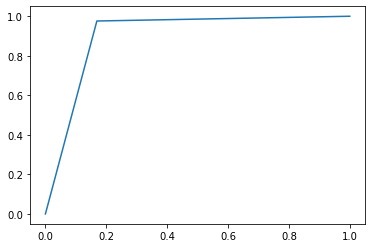

In [388]:
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(y_true, y_probas_knn, pos_label=1)
plt.plot(fpr_knn,tpr_knn)
plt.show() 

## Include updated features Logistic Regression with cross-validation and AUC-ROC

In [194]:
s = StandardScaler()

In [195]:
ln=linear_model.LogisticRegression()


In [196]:
pip_ln = make_pipeline(s, ln)

In [197]:
scores=cross_val_score(pip_ln, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.85510727, 0.84886019, 0.84683641, 0.84513693, 0.84999635])

In [381]:
y_predict_prob_ln=cross_val_predict(pip_ln, X_train, y_train['vote_republican'], cv=5, method='predict_proba')

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [382]:
y_predict_prob_ln

array([[0.33318092, 0.66681908],
       [0.14082387, 0.85917613],
       [0.09342525, 0.90657475],
       ...,
       [0.07935669, 0.92064331],
       [0.0602982 , 0.9397018 ],
       [0.10544173, 0.89455827]])

In [383]:
y_true = y_train['vote_republican']
y_probas_ln = y_predict_prob_ln[:,1]

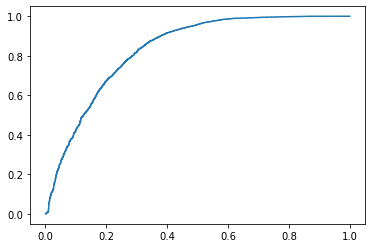

In [384]:
fpr_ln, tpr_ln, thresholds_ln = metrics.roc_curve(y_true, y_probas_ln, pos_label=1)
plt.plot(fpr_ln,tpr_ln)
plt.show() 

## Naive-Bayes Gaussian with cross-validation and AUC-ROC, and updated features

In [237]:
gnb=naive_bayes.GaussianNB()

In [238]:
pip_gnb = make_pipeline(s, gnb)

In [239]:
scores=cross_val_score(pip_gnb, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.81705451, 0.80409297, 0.806714  , 0.81560257, 0.81546769])

In [377]:
y_predict_prob_gnb=cross_val_predict(pip_gnb, X_train, y_train['vote_republican'], cv=5, method='predict_proba')

In [378]:
y_predict_prob_gnb

array([[7.90321374e-14, 1.00000000e+00],
       [4.57301776e-23, 1.00000000e+00],
       [1.66486994e-25, 1.00000000e+00],
       ...,
       [7.61745113e-26, 1.00000000e+00],
       [4.09733215e-24, 1.00000000e+00],
       [1.73554747e-24, 1.00000000e+00]])

In [379]:
y_true = y_train['vote_republican']
y_probas_gnb = y_predict_prob_gnb[:,1]

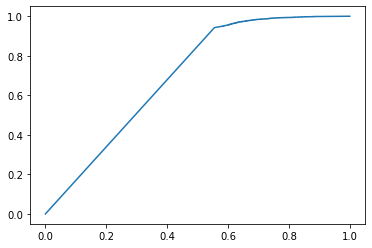

In [380]:
fpr_gnb, tpr_gnb, thresholds_gnb = metrics.roc_curve(y_true, y_probas_gnb, pos_label=1)
plt.plot(fpr_gnb,tpr_gnb)
plt.show() 

## Decision Tree with cross-validation and AUC-ROC, and updated features

In [168]:
clf = DecisionTreeClassifier()

In [169]:
pip_clf = make_pipeline(clf)

In [170]:
scores=cross_val_score(pip_clf, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.86131239, 0.86612485, 0.86547276, 0.8459324 , 0.84769841])

In [372]:
y_predict_prob_clf=cross_val_predict(pip_clf, X_train, y_train['vote_republican'], cv=5, method='predict_proba')

In [374]:
y_predict_prob_clf

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [375]:
y_true = y_train['vote_republican']
y_probas_clf = y_predict_prob_clf[:,1]

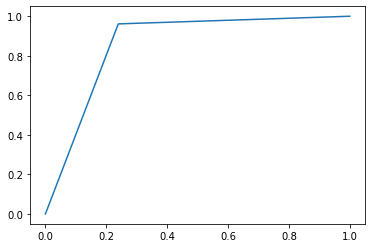

In [376]:
fpr_clf, tpr_clf, thresholds_clf = metrics.roc_curve(y_true, y_probas_clf, pos_label=1)
plt.plot(fpr_clf,tpr_clf)
plt.show() 

## Random Forest with cross-validation and AUC-ROC, and updated features


In [165]:
rdf = RandomForestClassifier()

In [166]:
pip_rdf = make_pipeline(rdf)

In [356]:
scores=cross_val_score(pip_rdf, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

array([0.99201583, 0.99111975, 0.99270237, 0.99284806, 0.98708793])

In [357]:
scores.mean()

0.9911547877257693

In [364]:
y_predict_prob_rdf=cross_val_predict(pip_rdf, X_train, y_train['vote_republican'], cv=5, method='predict_proba')

In [365]:
y_predict_prob_rdf

array([[0.43, 0.57],
       [0.  , 1.  ],
       [0.54, 0.46],
       ...,
       [0.08, 0.92],
       [0.02, 0.98],
       [0.12, 0.88]])

In [366]:
y_true = y_train['vote_republican']
y_probas_rdf = y_predict_prob_rdf[:,1]

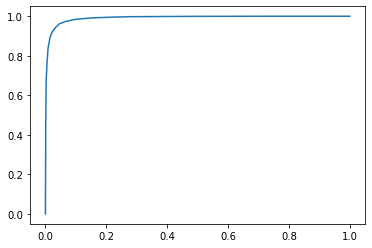

In [367]:
fpr_rdf, tpr_rdf, thresholds_rdf = metrics.roc_curve(y_true, y_probas_rdf, pos_label=1)
plt.plot(fpr_rdf,tpr_rdf)
plt.show() 

## XGBoost with cross-validation and AUC-ROC, and updated proportions


In [263]:
xgboost=XGBClassifier()

In [264]:
pip_xgb = make_pipeline(xgboost)

In [306]:
scores=cross_val_score(pip_xgb, X_train, y_train['vote_republican'], cv=5, scoring='roc_auc')
scores

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.98995695, 0.98764959, 0.98555407, 0.98655715, 0.98352532])

In [307]:
scores.mean()

0.986648613562287

In [368]:
y_predict_prob_xgb=cross_val_predict(pip_xgb, X_train, y_train['vote_republican'], cv=5, method='predict_proba')

/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:18:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:18:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:19:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

In [369]:
y_predict_prob_xgb

array([[0.23133719, 0.7686628 ],
       [0.00270373, 0.9972963 ],
       [0.8075432 , 0.1924568 ],
       ...,
       [0.04042393, 0.9595761 ],
       [0.00516498, 0.994835  ],
       [0.02454031, 0.9754597 ]], dtype=float32)

In [370]:
y_true = y_train['vote_republican']
y_probas_xgb = y_predict_prob_xgb[:,1]

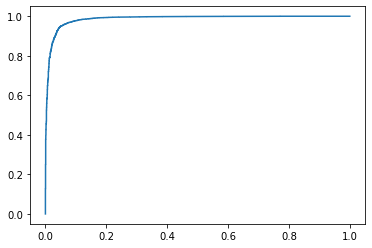

In [371]:
fpr_xgb, tpr_xgb, thresholds_xgb = metrics.roc_curve(y_true, y_probas_xgb, pos_label=1)
plt.plot(fpr_xgb,tpr_xgb)
plt.show() 

## Plot all ROC together 

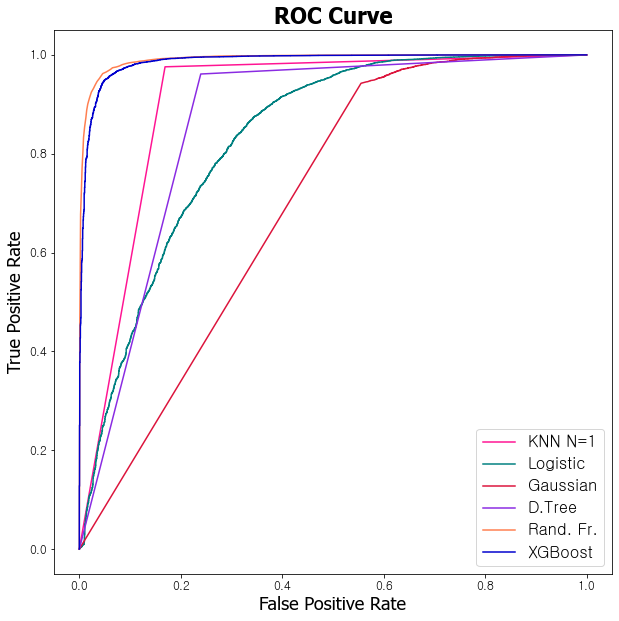

In [563]:
gfont = {'fontname':'Gulim','size': 12}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
plt.plot(fpr_knn,tpr_knn, label="KNN N=1", color='deeppink')
plt.plot(fpr_ln,tpr_ln, label='Logistic', color='teal')
plt.plot(fpr_gnb,tpr_gnb, label='Gaussian', color='crimson')
plt.plot(fpr_clf,tpr_clf, label='D.Tree',color='blueviolet')
plt.plot(fpr_rdf,tpr_rdf, label='Rand. Fr.', color='coral')
plt.plot(fpr_xgb,tpr_xgb,label='XGBoost',color='mediumblue')
plt.legend(prop={"family":"Gulim",'size': 16})
plt.xlabel("False Positive Rate", **tfont)
plt.ylabel("True Positive Rate", **tfont)
plt.title('ROC Curve', **tbfont)
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('ROC_curve.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show() 



## Pick Random Forest, tune hyperparameters

In [458]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# class_weight 
class_weight=['balanced','balanced_subsample',None]
# criterion
criterion=['gini','entropy']

In [463]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight,
               'criterion': criterion}


In [464]:
rf_random = RandomizedSearchCV(estimator = rdf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [465]:
rf_random.fit(X_train, y_train['vote_republican'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 45.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                 

In [466]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'criterion': 'entropy',
 'class_weight': None,
 'bootstrap': False}

In [467]:
rf_random.best_score_

0.9676742233417297

In [480]:
grid_params= {'n_estimators': [100,200,300,500],
 'min_samples_split': [1,2,3],
 'min_samples_leaf': [1,2],
 'max_features': [2,3],
 'max_depth': [40,50,60,70],
 'criterion': ['entropy'],
 'class_weight': [None],
 'bootstrap': [False]}

In [481]:
rdf = RandomForestClassifier(random_state=42)

In [482]:
gs=GridSearchCV(estimator = rdf, param_grid=grid_params, scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)

In [483]:
gs_results=gs.fit(X_train, y_train['vote_republican'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.3s
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  9.6min finished


In [484]:
gs_results.best_score_

0.993886494389774

In [485]:
gs.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=40,
                       max_features=3, n_estimators=500, random_state=42)

In [486]:
gs.best_params_

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [487]:
grid_params_2= {'n_estimators': [500,700,1000],
 'min_samples_split': [2],
 'min_samples_leaf': [1],
 'max_features': [3,5,10],
 'max_depth': [40],
 'criterion': ['entropy'],
 'class_weight': [None],
 'bootstrap': [False]}

In [488]:
gs_2=GridSearchCV(estimator = rdf, param_grid=grid_params, scoring='roc_auc', cv = 3, verbose=2, n_jobs = -1)

In [489]:
gs_results_2=gs_2.fit(X_train, y_train['vote_republican'])

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
/Users/mariamyousuf/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  9.7min finished


In [494]:
gs_results_2.best_score_

0.993886494389774

In [495]:
gs_2.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=40,
                       max_features=3, n_estimators=500, random_state=42)

In [496]:
gs_2.best_params_

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

## Use RDF with hyperparameters from gridsearch on test and draw graphs

In [ ]:
X_test=X_test.fillna(0)

In [506]:
rdf_final=RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=40,
                       max_features=3, n_estimators=500, random_state=42)

In [520]:
rdf_final=rdf_final.fit(X_train, y_train['vote_republican'])

(8214, 37)

In [550]:
y_predict_final=rdf_final.predict(X_test)

In [551]:
y_predict_final.shape

(8214,)

In [552]:
y_predict_proba_final=rdf_final.predict_proba(X_test)

In [553]:
y_predict_proba_final.shape

(8214, 2)

In [554]:
y_true = y_test['vote_republican']
y_probas_final = y_predict_proba_final[:,1]

In [ ]:
fpr_final, tpr_final, thresholds_final = metrics.roc_curve(y_true, y_probas_final, pos_label=1)

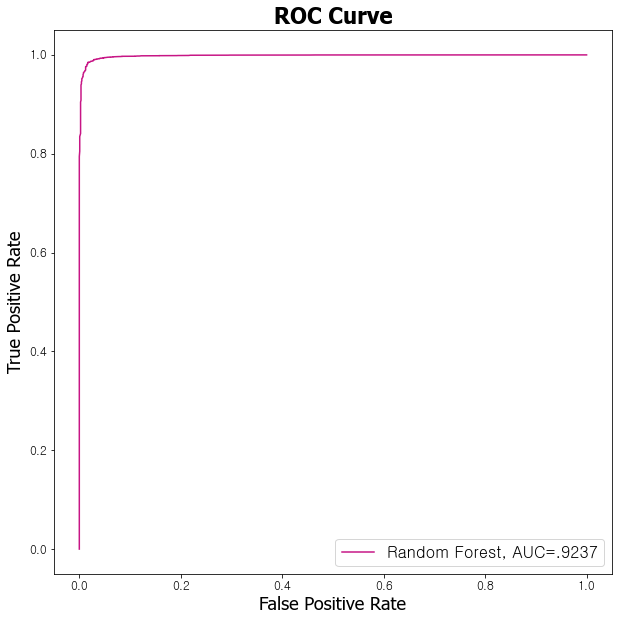

In [564]:
gfont = {'fontname':'Gulim','size': 12}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
plt.plot(fpr_final,tpr_final, label='Random Forest, AUC=.9237', color='mediumvioletred')
plt.legend(prop={"family":"Gulim",'size': 16})
plt.xlabel("False Positive Rate", **tfont)
plt.ylabel("True Positive Rate", **tfont)
plt.title('ROC Curve', **tbfont)
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('ROC_curve_2.png',bbox_inches='tight',facecolor='white', edgecolor='white')

plt.show() 

In [556]:
metrics.roc_auc_score(y_test['vote_republican'], y_predict_final)

0.9236877825484451

## Use same random forest to find list of counties in the "middle"

In [566]:
X_test.shape

(8214, 37)

In [567]:
y_test.shape

(8214, 5)

In [568]:
test_df=pd.concat([X_test,y_test], axis=1)
test_df.reset_index(inplace=True)
test_df


index  year  prof_business_serv_employ  financial_activities_employ  \
0     11051  2012                     472.00                       179.25   
1     21531  2015                      25.75                        53.25   
2     22275  2016                    8251.50                      1845.50   
3     17797  2014                     392.00                       438.75   
4     20455  2015                     569.50                       135.50   
...     ...   ...                        ...                          ...   
8209   1783  2009                    9222.00                      5106.25   
8210     62  2009                   54389.00                     30213.00   
8211      0  2009                    2655.75                      1332.50   
8212   9655  2012                     754.75                       408.00   
8213   3462  2010                    7090.50                      2106.50   

      unclass_employ  mining_employ  hospitality_employ  info_employ  \
0              25.75         245.50              447.00        42.75   
1               1.00           0.00              134.50         0.00   
2               0.00          69.00             4997.00      1121.00   
3               0.00         323.25             1173.75        86.75   
4               2.25         251.25              432.00        15.25   
...              ...            ...                 ...          ...   
8209            0.00         118.00             9677.50      1547.50   
8210           28.75        1096.50            23276.75     17637.00   
8211           27.25         136.75            12400.75       361.75   
8212            0.00         108.25             1119.50       151.75   
8213            5.75         295.00             6395.50       668.00   

      manufacturing_employ  other_services_employ  ...  \
0                   476.75                  71.50  ...   
1                   620.25                  68.75  ...   
2                 10668.00                1102.50  ...   
3                  1275.25                 405.25  ...   
4                   511.50                 162.25  ...   
...                    ...                    ...  ...   
8209              12826.50                3432.75  ...   
8210               7195.25                7364.75  ...   
8211               3728.75                1391.00  ...   
8212               3476.25                 190.25  ...   
8213               7632.50                1186.00  ...   

      other_services_avg_week_wage  edu_health_services_avg_week_wage  \
0                           440.75                             505.00   
1                           535.75                             493.25   
2                           749.00                             933.75   
3                           376.75                             688.50   
4                           406.00                             557.00   
...                            ...                                ...   
8209                        493.75                             797.75   
8210                        684.50                             937.50   
8211                        500.50                             919.50   
8212                        485.50                             492.75   
8213                        431.00                             739.00   

      construction_avg_week_wage  trade_transport_avg_week_wage  \
0                         590.50                         763.75   
1                           0.00                         536.75   
2                         792.50                         603.25   
3                         822.75                         512.25   
4                        1032.75                        1423.25   
...                          ...                            ...   
8209                      973.25                         663.25   
8210                     1032.50                         862.25   
8211                      701.50       

In [576]:
test_df["predict"]=y_predict_final
test_df["predict_prob"]=y_predict_proba_final[:,1]

In [584]:
# test_df=test_df.drop("predit_prob",axis=1)

In [605]:
pd.set_option('display.max_rows', None)

In [606]:
test_df[(test_df['predict_prob']<.55)&(test_df['predict_prob']>.45)].sort_values(by=['predict_prob'])

index  year  prof_business_serv_employ  financial_activities_employ  \
4145  24389  2016                     366.75                       322.25   
868     996  2009                   12357.00                     10047.25   
2601   2534  2009                   21965.25                     14238.25   
3759   6084  2010                     194.75                       200.50   
1803   1642  2009                     441.75                       272.25   
5800  22077  2016                    6562.00                      3334.50   
6699  17842  2014                     177.50                       319.25   
4812   2182  2009                    6747.25                      2859.50   
3412    776  2009                      10.00                         9.00   
3587  24393  2016                    1045.25                       640.75   
3041   5464  2010                     307.25                       326.25   
4732   1163  2009                    1712.25                       671.75   
6382   2753  2009                    2576.75                       994.25   
6829   6916  2011                     984.25                       297.25   
4445  23840  2016                     454.25                       230.50   
2766   5598  2010                     728.75                       334.50   
3320    812  2009                    2707.75                      1214.75   
4475   3043  2009                    6986.00                      3859.25   
5469  15615  2014                     590.25                       372.00   
7254   8227  2011                     553.50                       125.25   
312    6919  2011                     886.00                       581.75   
850   21864  2016                      16.50                         7.25   
1873   2140  2009                    1070.75                       431.25   
1568   5343  2010                     249.00                       220.75   
7013  13870  2013                     168.00                       291.00   
3891  14230  2013                     569.00                       113.50   
3307  10870  2012                     292.75                       287.50   
6070  15555  2014                      69.75                        86.50   
2512  22316  2016                    6240.25                      2459.50   
4798   3505  2010                     354.50                       276.25   
7147  14386  2013                     128.50                         0.00   
2902  23246  2016                      56.75                        85.25   
3157   9539  2012                    2844.00                      1295.25   
3918   3328  2010                    2727.50                      1186.00   
5535   8240  2011                      25.00                       129.00   
1529  12347  2012                     407.25                       443.00   
7157   7753  2011                      73.75                        98.00   
8161   2499  2009                   11780.75                      3732.75   
3828   8952  2011                    1428.75                       626.25   
1280  11693  2012                     121.50                       255.50   
5046  16038  2014                     930.75                       681.00   
3447    554  2009                   45377.25                     25888.50   
3347   6705  2011                    4108.50                       871.75   
5592  10982  2012                      67.75                        30.25   
5308   3801  2010                    1413.25                       845.50   
2889   2404  2009                      63.25                        54.25   
2508  22562  2016                     976.00                       245.50   
6588   2129  2009                      88.00                         0.00   
7452   3625  2010                    1398.75                       613.50   
5110  18906  2015                   10767.00                      3040.00   
5207  13848  2013                      48.50                        47.00   
79

In [615]:
test_df[(test_df['predict_prob']<.55)&(test_df['predict_prob']>.45)]['county_name'].value_counts()

Kauai            4
Marlboro         3
Rock Island      2
St. James        2
Washington       2
Claiborne        2
Cibola           2
Marengo          2
Wilcox           2
Marion           2
Madison          2
Franklin         2
Liberty          2
Allendale        2
Chester          2
San Juan         2
Johnson          1
Maverick         1
Lake             1
Newport News     1
Glacier          1
Tolland          1
Dallas           1
Pasquotank       1
Bamberg          1
Silver Bow       1
Dillon           1
Yazoo            1
Linn             1
Petersburg       1
Black Hawk       1
La Salle         1
Northampton      1
Jackson          1
Hampton          1
Humphreys        1
Kemper           1
Chatham          1
Hood River       1
Rockdale         1
Anson            1
St. Francis      1
Halifax          1
Lorain           1
Grand Isle       1
Manassas Park    1
Calhoun          1
Whatcom          1
Newton           1
Cumberland       1
San Benito       1
Scott            1
Calvert     

In [614]:
len(test_df[(test_df['predict_prob']<.55)&(test_df['predict_prob']>.45)]['county_name'].value_counts().tolist())

61

In [616]:
test_df[(test_df['predict_prob']<.55)&(test_df['predict_prob']>.45)]['state_fips_code'].value_counts()

45    11
51     7
28     7
37     6
1      5
13     5
22     4
15     4
30     3
48     3
19     3
8      3
35     3
17     2
50     2
41     1
39     1
53     1
27     1
29     1
4      1
24     1
23     1
9      1
6      1
5      1
55     1
Name: state_fips_code, dtype: int64

In [617]:
len(test_df[(test_df['predict_prob']<.55)&(test_df['predict_prob']>.45)]['state_fips_code'].value_counts().tolist())

27

In [618]:
test_df[(test_df['predict_prob']<.55)&(test_df['predict_prob']>.45)]['total_all_industries_avg_week_wage'].mean()

703.196875

In [625]:
test_df[(test_df['predict_prob']>=.55) | (test_df['predict_prob']<=.45)]['total_all_industries_avg_week_wage'].mean()

682.5699225473322

In [626]:
test_df[(test_df['predict_prob']<.55)&(test_df['predict_prob']>.45)]['total_all_industries_estab'].mean()

1829.853125

In [627]:
test_df[(test_df['predict_prob']>=.55) | (test_df['predict_prob']<=.45)]['total_all_industries_estab'].mean()

2665.404843865257

In [628]:
test_df[(test_df['predict_prob']<.55)&(test_df['predict_prob']>.45)]['total_all_industries_employ'].mean()

24013.678125

In [629]:
test_df[(test_df['predict_prob']>=.55) | (test_df['predict_prob']<=.45)]['total_all_industries_employ'].mean()

35448.999108679614

In [630]:
cnf_matrix = metrics.confusion_matrix(y_test['vote_republican'], y_predict_final)

In [631]:
cnf_matrix

array([[1024,  182],
       [  12, 6996]])

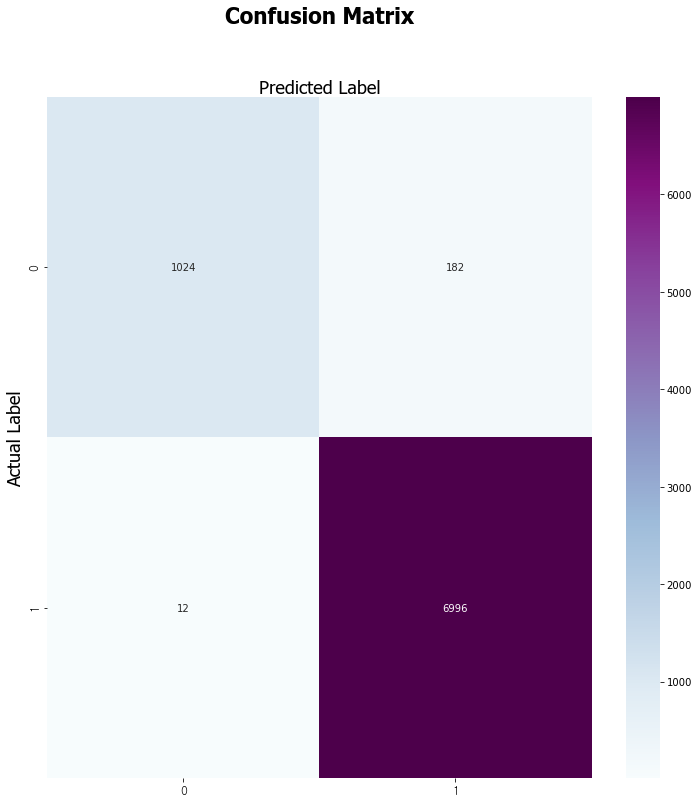

In [650]:
gfont = {'fontname':'Gulim','size': 12}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
class_names=['Dem','Rep']
fig, ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names, **gfont)
plt.yticks(tick_marks, class_names,**gfont)
ax.xaxis.set_label_position("top")
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="BuPu",fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix', y=1.1, **tbfont)
plt.ylabel('Actual Label', **tfont)
plt.xlabel('Predicted Label',**tfont)
plt.rcParams["figure.figsize"] = (10,10);
plt.savefig('Confusion_Matrix',bbox_inches = "tight",facecolor='w', edgecolor='w')

## Scratch Work 

In [ ]:
knn_10 = neighbors.KNeighborsClassifier(n_neighbors=10)

In [117]:
knn_10.fit(X_train_scaled, y_train['vote_republican'])

KNeighborsClassifier(n_neighbors=10)

In [118]:
scores=cross_val_score(knn_10, X_train, y_train['vote_republican'], cv=5, scoring='accuracy')

In [119]:
scores

array([0.91694153, 0.91094453, 0.91634183, 0.91784108, 0.90581884])

In [120]:
np.average(scores)

0.9135775603499988

In [65]:
knn_5 = neighbors.KNeighborsClassifier(n_neighbors=5)

In [62]:
knn_5.fit(X_train_scaled, y_train['vote_republican'])

KNeighborsClassifier()

In [66]:
scores=cross_val_score(knn_5, X_train, y_train['vote_republican'], cv=5, scoring='accuracy')

In [67]:
scores

array([0.95142429, 0.94542729, 0.94962519, 0.94812594, 0.94541092])

In [68]:
np.average(scores)

0.9480027232934223

In [69]:
knn_3 = neighbors.KNeighborsClassifier(n_neighbors=3)

In [70]:
knn_3.fit(X_train_scaled, y_train['vote_republican'])

KNeighborsClassifier(n_neighbors=3)

In [71]:
scores=cross_val_score(knn_3, X_train, y_train['vote_republican'], cv=5, scoring='accuracy')

In [72]:
scores

array([0.96611694, 0.96341829, 0.97061469, 0.96671664, 0.9670066 ])

In [73]:
np.average(scores)

0.9667746330793812

In [74]:
knn_2 = neighbors.KNeighborsClassifier(n_neighbors=2)

In [75]:
knn_2.fit(X_train_scaled, y_train['vote_republican'])

KNeighborsClassifier(n_neighbors=2)

In [87]:
scores=cross_val_score(knn_2, X_train, y_train['vote_republican'], cv=5, scoring='accuracy')

In [88]:
scores

array([0.96911544, 0.96551724, 0.97331334, 0.96551724, 0.96490702])

In [89]:
np.average(scores)

0.9676740573924196

In [ ]:
scores_prec=cross_val_score(knn_2, X_train, y_train['vote_republican'], cv=5, scoring='precision')

In [85]:
scores_prec

array([0.99283668, 0.98963545, 0.99498747, 0.98788742, 0.98857551])

In [86]:
np.average(scores_prec)

0.9907845063656724

In [96]:
scores_recall=cross_val_score(knn_2, X_train, y_train['vote_republican'], cv=5, scoring='recall')

In [97]:
scores_recall

array([0.9709282 , 0.96987741, 0.97372109, 0.97161878, 0.97021724])

In [98]:
np.average(scores_recall)

0.9712725434054519

In [79]:
knn_1 = neighbors.KNeighborsClassifier(n_neighbors=1)

In [80]:
knn_1.fit(X_train_scaled, y_train['vote_republican'])

KNeighborsClassifier(n_neighbors=1)

In [81]:
scores=cross_val_score(knn_1, X_train, y_train['vote_republican'], cv=5, scoring='accuracy')

In [82]:
scores

array([0.9838081 , 0.9814093 , 0.98770615, 0.97661169, 0.98170366])

In [83]:
np.average(scores)

0.982247778330391

In [99]:
scores_prec=cross_val_score(knn_1, X_train, y_train['vote_republican'], cv=5, scoring='precision')

In [100]:
scores_prec

array([0.99054291, 0.98811604, 0.99229961, 0.98463687, 0.98675497])

In [101]:
np.average(scores_prec)

0.9884700807796841

In [102]:
scores_recall=cross_val_score(knn_1, X_train, y_train['vote_republican'], cv=5, scoring='recall')

In [103]:
scores_recall

array([0.99054291, 0.99019264, 0.99334268, 0.9880869 , 0.99194114])

In [104]:
np.average(scores_recall)

0.9908212518884609

In [109]:
X_test=X_test.fillna(0)

In [110]:
X_scaled_test=s.transform(X_test)

In [111]:
X_scaled_test

array([[-2.17894138e-01, -1.96208209e-01, -1.86734933e-01, ...,
        -3.60607743e-01,  8.74765562e-01, -5.01400432e-01],
       [ 1.09041225e+00, -2.13594473e-01, -1.97544257e-01, ...,
        -2.28277108e+00, -5.04486624e-01, -1.30673056e-01],
       [ 1.52651439e+00,  1.06887461e-01, -4.37902008e-02, ...,
         2.96931622e-01, -1.00432569e-01,  2.53939240e-01],
       ...,
       [-1.52620053e+00, -1.11127526e-01, -8.77995916e-02, ...,
         7.13393005e-04, -6.10816638e-01, -3.33392895e-01],
       [-2.17894138e-01, -1.85192038e-01, -1.67110862e-01, ...,
        -3.34656334e-02, -6.85247648e-01, -2.84795673e-01],
       [-1.09009840e+00,  6.16539536e-02, -2.13994581e-02, ...,
         2.38339005e-01, -3.52586603e-01, -2.65361531e-02]])

In [112]:
y_predict=knn_1.predict(X_scaled_test)

In [113]:
print("Accuracy:",metrics.accuracy_score(y_test['vote_republican'], y_predict))

Accuracy: 0.9633552471390309


In [114]:
print("Precision:",metrics.precision_score(y_test['vote_republican'], y_predict))

Precision: 0.9766879886282871


In [115]:
print("Recall:",metrics.recall_score(y_test['vote_republican'], y_predict))

Recall: 0.9804509132420092


In [122]:
cnf_matrix = metrics.confusion_matrix(y_test['vote_republican'], y_predict)

In [123]:
cnf_matrix

array([[1042,  164],
       [ 137, 6871]])

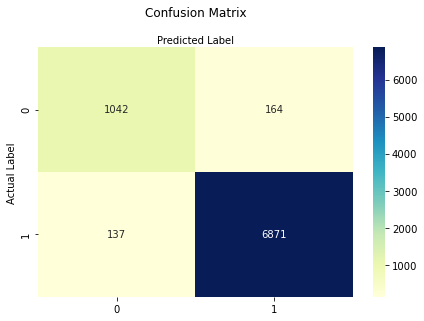

In [134]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');
plt.savefig('Confusion_Matrix',bbox_inches = "tight",facecolor='w', edgecolor='w')